In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge,
    SGDRegressor,
    LogisticRegression)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from Utils import shapiro_w, mannwhitney_u, research_py, chi_2
import warnings
warnings.filterwarnings('ignore')

## Passo 1
- Realizar análises descritivas sobre os dados, explorando todas as variáveis do modelo: varáveis qualitativas e quantitativas.

**marcas**, **modelo**, **ano**, **km**, **km_urbano**, **km_rodovia**, **potencia**, **torque**, **cap_motor**, **cap_combustível**, **num_cilindros**, **num_assento**, **num_proprietários**, **preço**, **link**, **condição**, **tipo**, **portas**, **tração_rodas**, **tipo_motor**, **nível velocidade**, **altura dianteira**, **espaço pernas dianteiro**, **altura traseira**, **espaço pernas traseiro**, **registros serviço**

In [2]:
df = pd.read_csv('Data/cars.csv')
df.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [3]:
df.shape

(52, 27)

In [4]:
df.dtypes

id                         int64
brand                     object
model                     object
year                       int64
miles                      int64
city_mileage               int64
highway_mileage            int64
horsepower                 int64
torque                     int64
engine_capacity_litre    float64
fuel_capacity            float64
num_cylinder               int64
num_seat                   int64
num_owners                 int64
price                      int64
link                      object
condition                float64
type                      object
doors                      int64
wheel_drive                int64
engine_type               object
speed_levels             float64
front_headroom           float64
front_legroom            float64
rear_headroom            float64
rear_legroom             float64
service_records            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [8]:
df[['condition', 'speed_levels']].T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
condition,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed_levels,6.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,8.0,6.0,...,6.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,6.0,6.0


In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,52.0,31.37,15.38,3.0,18.75,31.5,44.25,57.0
year,52.0,2018.67,1.40,2014.0,2018.00,2019.0,2019.25,2022.0
miles,52.0,33901.25,22700.65,5000.0,16454.75,27448.5,42442.00,97027.0
city_mileage,52.0,29.04,5.95,17.0,26.50,30.0,30.00,55.0
highway_mileage,52.0,37.42,4.14,24.0,35.75,38.0,40.00,49.0
horsepower,52.0,176.87,33.79,143.0,152.00,159.5,192.00,288.0
torque,52.0,177.92,47.26,99.0,138.00,181.0,192.00,294.0
engine_capacity_litre,52.0,1.83,0.38,1.4,1.50,2.0,2.00,3.5
fuel_capacity,52.0,14.23,2.60,7.0,12.40,13.6,15.05,19.0
num_cylinder,52.0,4.04,0.28,4.0,4.00,4.0,4.00,6.0


In [10]:
sns.set_style("whitegrid")

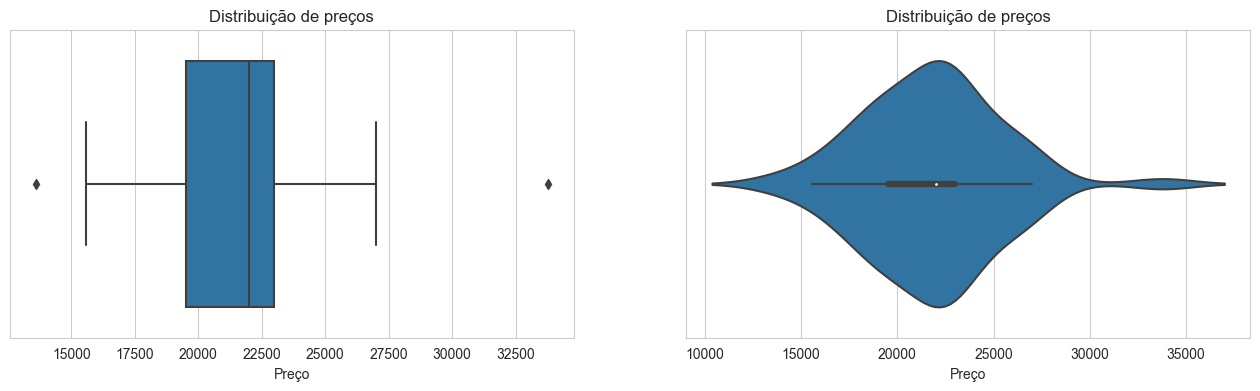

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(data=df, x='price', ax=ax[0])
ax[0].set_title('Distribuição de preços')
ax[0].set_xlabel('Preço')
sns.violinplot(data=df, x='price', ax=ax[1])
ax[1].set_title('Distribuição de preços')
ax[1].set_xlabel('Preço')
plt.show()

> Foram encontrados
---
- 51 registros nulos em **condition** não sera analisado
- 1 registro nulo **speed_levels**
- 0 registros duplicados
- 2 outliers a serem analisados
- **type** não será analisado por conter somente tipo **sedan**
- **doors** não será analisado por conter somente veículos com **4** portas
- **num_seat** não será analisado por conter somente veículos com **5** assento
- **link** não será analisado pois contem o link de 2 lojas apenas
- Variáveis **front_headroom**, **front_legroom**, **rear_headroom** e **rear_legroom** por serem apenas carros do tipo sedan sofrem poucas variações

> Perguntas
- O que interfere no preço dos veículos?
  - Marca/Modelo
  - Ano
  - Número de donos
  - km
  - Potência
  - Número de ordens de serviço
  - Espaço interno

## Passo 2
- Realizar a análise exploratória dos dados, utilizando técnicas de storytelling.

#### Marca/Modelo

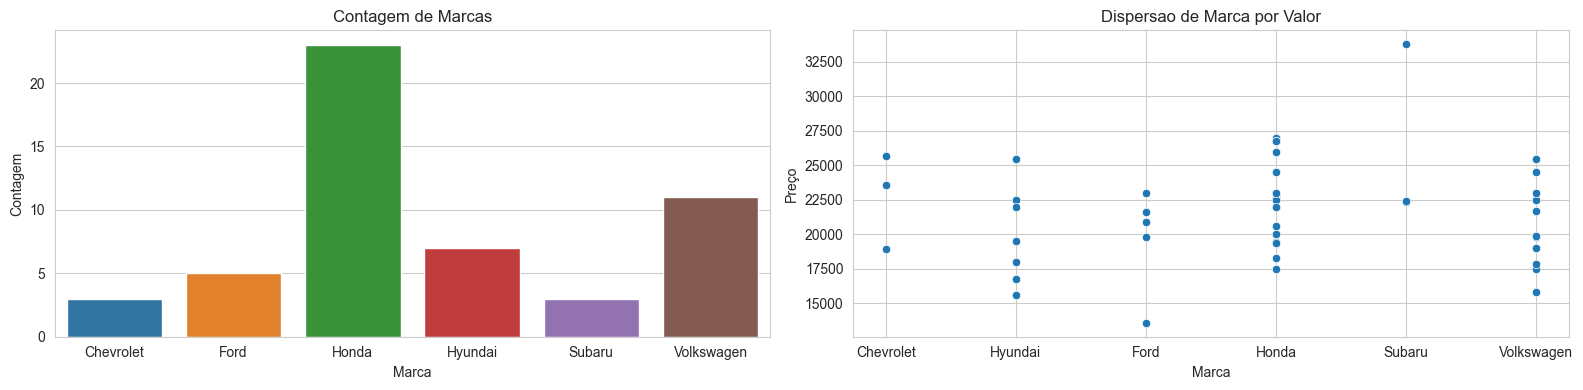

In [12]:
brand = df.groupby('brand')['brand'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x='brand', y='count', data=brand, ax=ax[0])
ax[0].set_title('Contagem de Marcas')
ax[0].set_xlabel('Marca')
ax[0].set_ylabel('Contagem')
sns.scatterplot(data=df, x='brand', y='price', ax=ax[1])
ax[1].set_title('Dispersao de Marca por Valor')
ax[1].set_xlabel('Marca')
ax[1].set_ylabel('Preço')
fig.tight_layout()
plt.show()

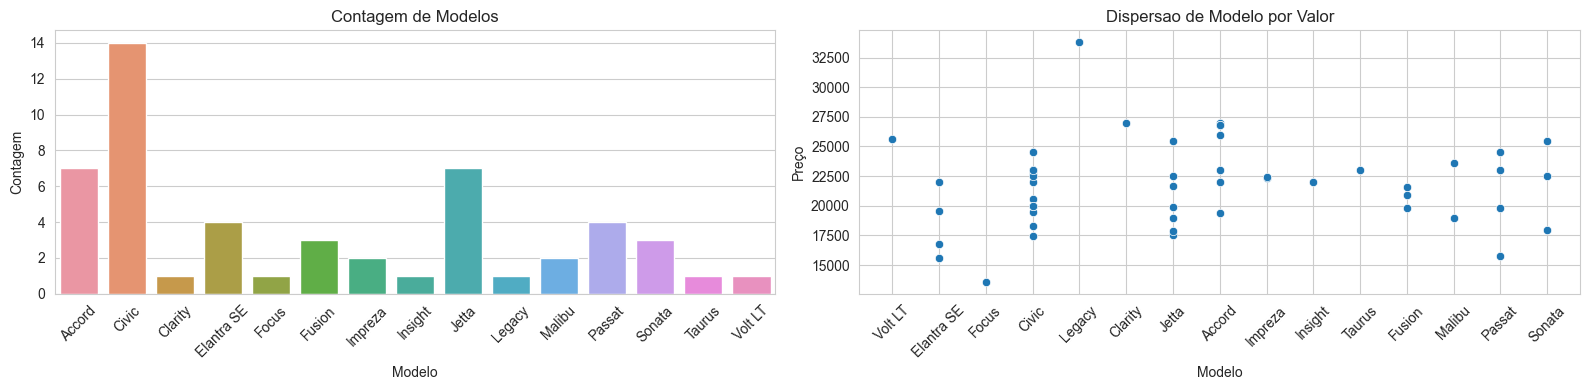

In [13]:
model = df.groupby('model')['model'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x='model', y='count', data=model, ax=ax[0])
ax[0].set_title('Contagem de Modelos')
ax[0].set_xlabel('Modelo')
ax[0].set_ylabel('Contagem')
ax[0].tick_params(axis='x', rotation=45)
sns.scatterplot(data=df, x='model', y='price', ax=ax[1])
ax[1].set_title('Dispersao de Modelo por Valor')
ax[1].set_xlabel('Modelo')
ax[1].set_ylabel('Preço')
ax[1].tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

#### Espaço

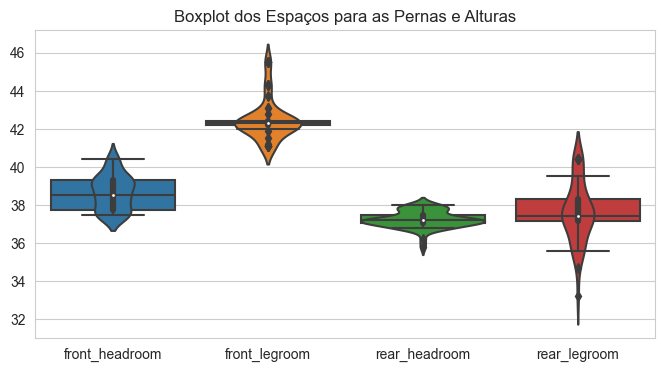

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.violinplot(data=df[['front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom']], ax=ax)
sns.boxplot(data=df[['front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom']], ax=ax)
plt.title('Boxplot dos Espaços para as Pernas e Alturas')
plt.show()

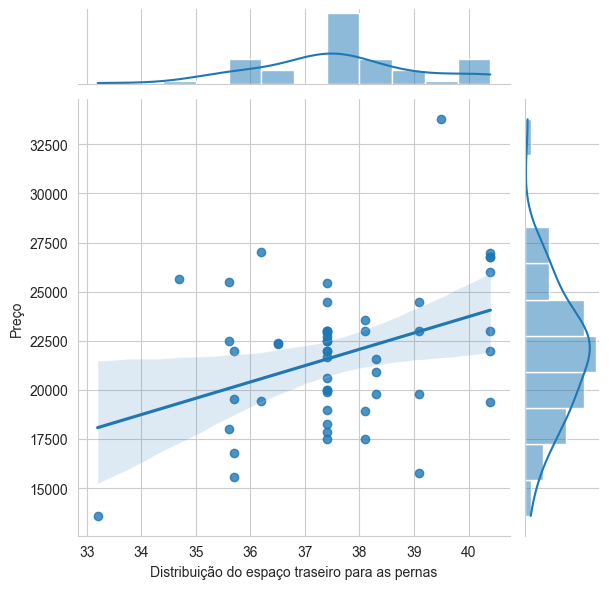

In [15]:
sns.jointplot(x="rear_legroom", y="price", data=df, kind="reg")
plt.xlabel('Distribuição do espaço traseiro para as pernas')
plt.ylabel('Preço')
plt.show()

#### ANO

In [16]:
print("Modelo mais antigo: ", df['year'].min())
print("Modelo mais novo: ", df['year'].max())

Modelo mais antigo:  2014
Modelo mais novo:  2022


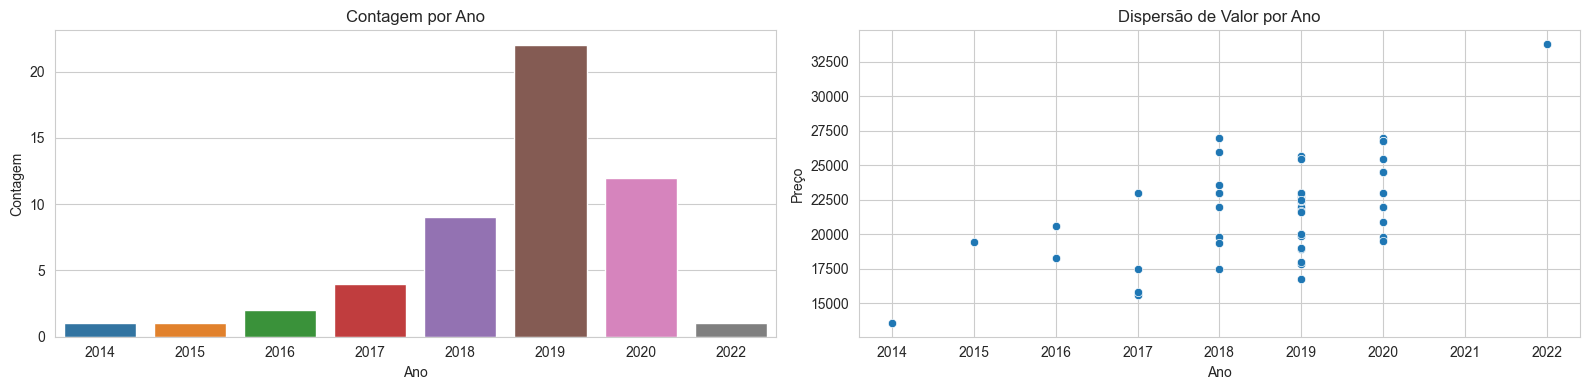

In [17]:
year = df.groupby('year')['year'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x='year', y='count', data=year, ax=ax[0])
ax[0].set_title('Contagem por Ano')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Contagem')
sns.scatterplot(data=df, x='year', y='price', ax=ax[1])
ax[1].set_title('Dispersão de Valor por Ano')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Preço')
fig.tight_layout()
plt.show()

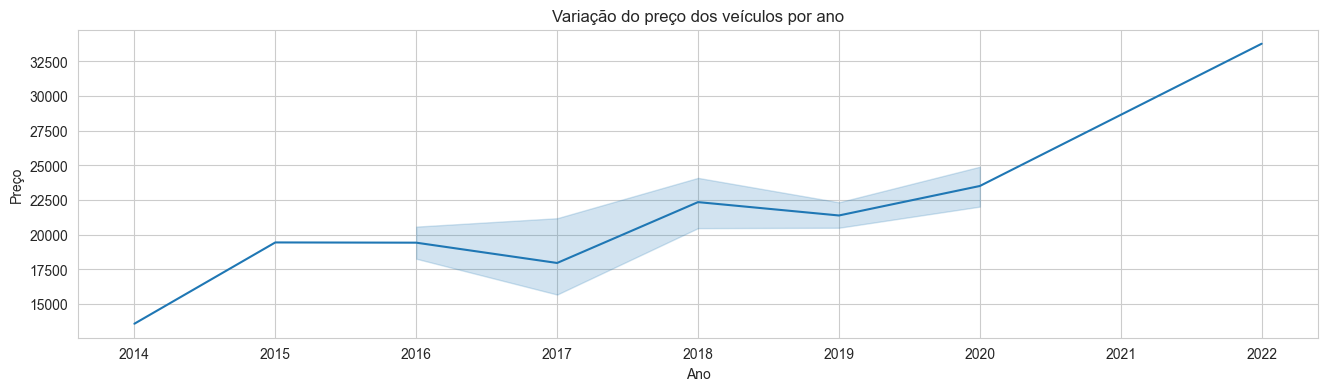

In [18]:
fig = plt.subplots(figsize=(16, 4))
sns.lineplot(x='year', y='price', data=df)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Variação do preço dos veículos por ano')
plt.show()

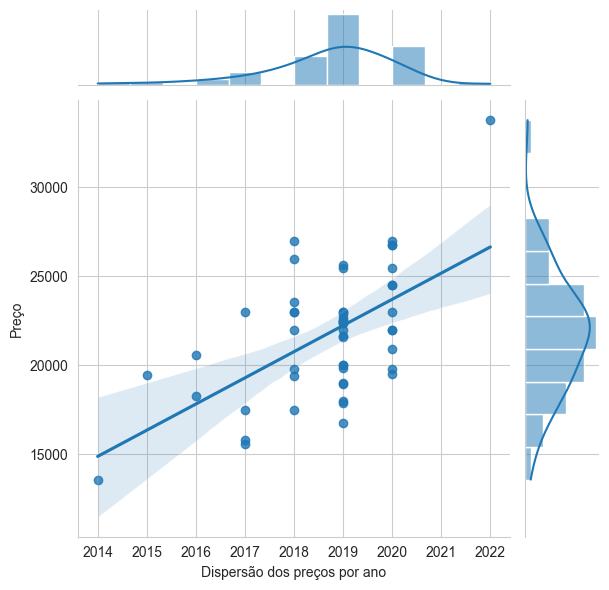

In [19]:
sns.jointplot(x="year", y="price", data=df, kind="reg")
plt.xlabel('Dispersão dos preços por ano')
plt.ylabel('Preço')
plt.show()

#### Tração  

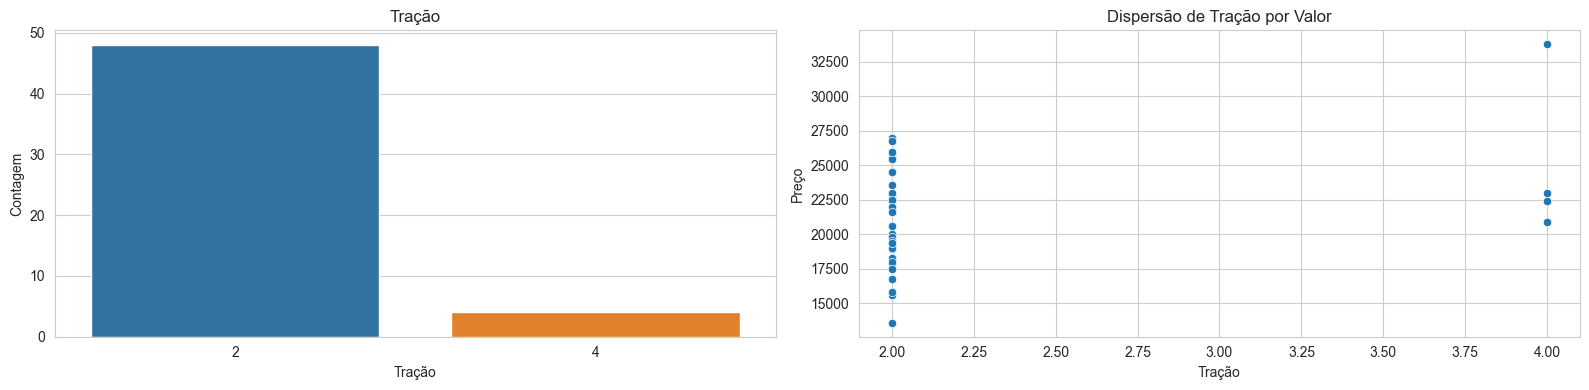

In [20]:
wheel_drive = df.groupby('wheel_drive')['wheel_drive'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x='wheel_drive', y='count', data=wheel_drive, ax=ax[0])
ax[0].set_title('Tração')
ax[0].set_xlabel('Tração')
ax[0].set_ylabel('Contagem')
sns.scatterplot(data=df, x='wheel_drive', y='price', ax=ax[1])
ax[1].set_title('Dispersão de Tração por Valor')
ax[1].set_xlabel('Tração')
ax[1].set_ylabel('Preço')
fig.tight_layout()
plt.show()

#### Motor

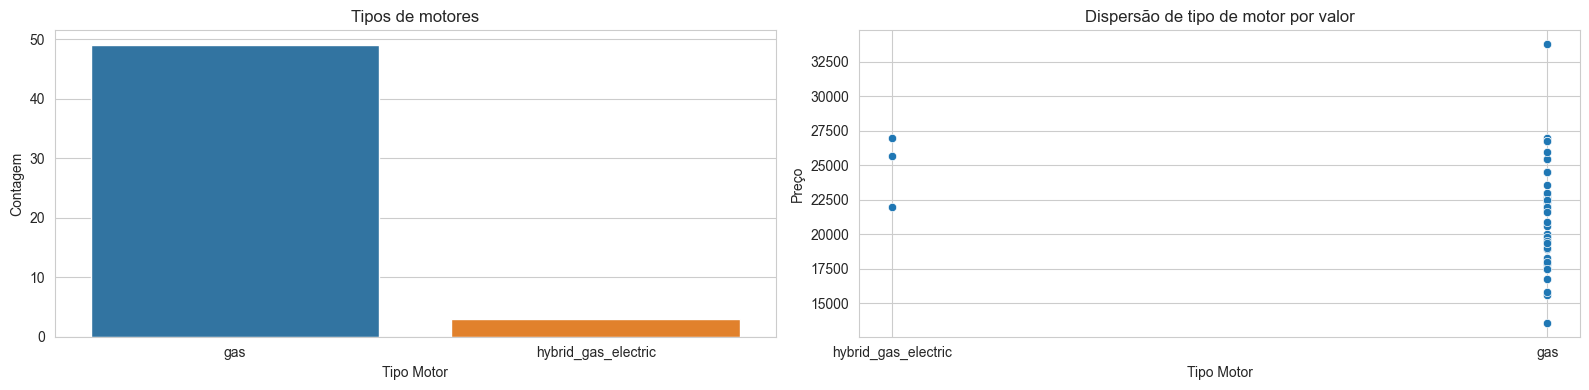

In [21]:
engine_type = df.groupby('engine_type')['engine_type'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x='engine_type', y='count', data=engine_type, ax=ax[0])
ax[0].set_title('Tipos de motores')
ax[0].set_xlabel('Tipo Motor')
ax[0].set_ylabel('Contagem')
sns.scatterplot(data=df, x='engine_type', y='price', ax=ax[1])
ax[1].set_title('Dispersão de tipo de motor por valor')
ax[1].set_xlabel('Tipo Motor')
ax[1].set_ylabel('Preço')
fig.tight_layout()
plt.show()

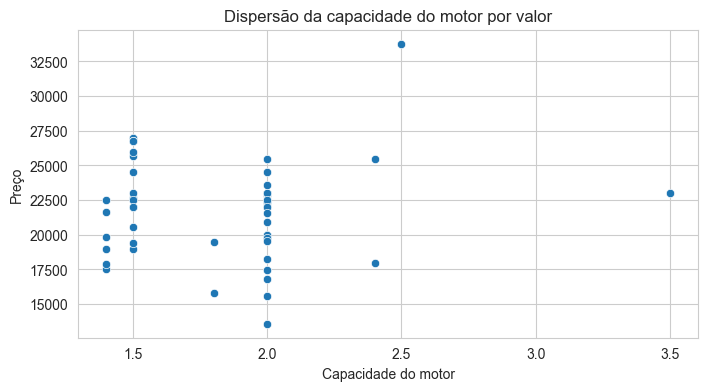

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='engine_capacity_litre', y='price', ax=ax)
ax.set_title('Dispersão da capacidade do motor por valor')
ax.set_xlabel('Capacidade do motor')
ax.set_ylabel('Preço')
plt.show()

#### Potência

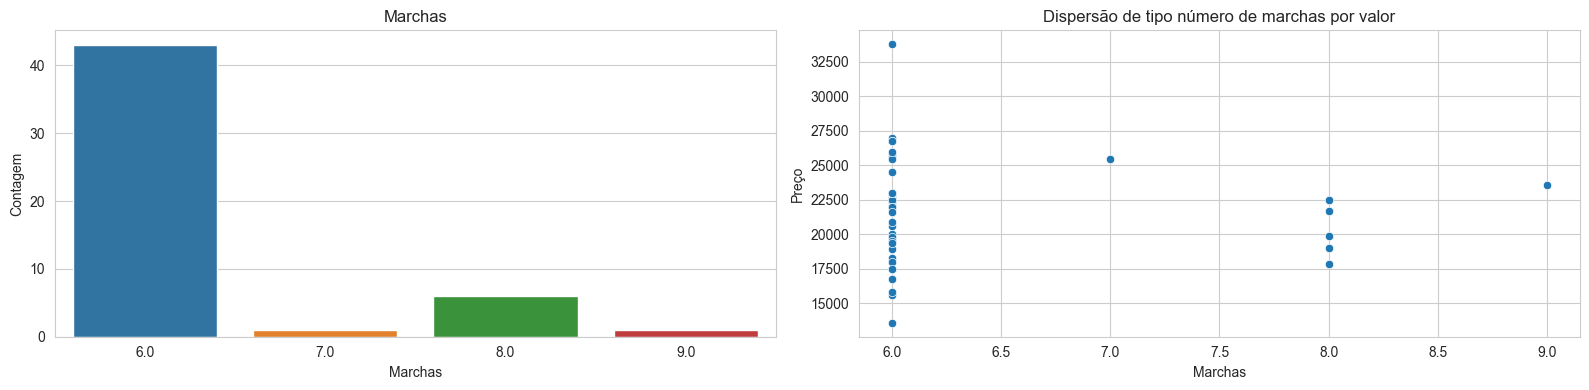

In [23]:
speed_levels = df.groupby('speed_levels')['speed_levels'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x='speed_levels', y='count', data=speed_levels, ax=ax[0])
ax[0].set_title('Marchas')
ax[0].set_xlabel('Marchas')
ax[0].set_ylabel('Contagem')
sns.scatterplot(data=df, x='speed_levels', y='price', ax=ax[1])
ax[1].set_title('Dispersão de tipo número de marchas por valor')
ax[1].set_xlabel('Marchas')
ax[1].set_ylabel('Preço')
fig.tight_layout()
plt.show()

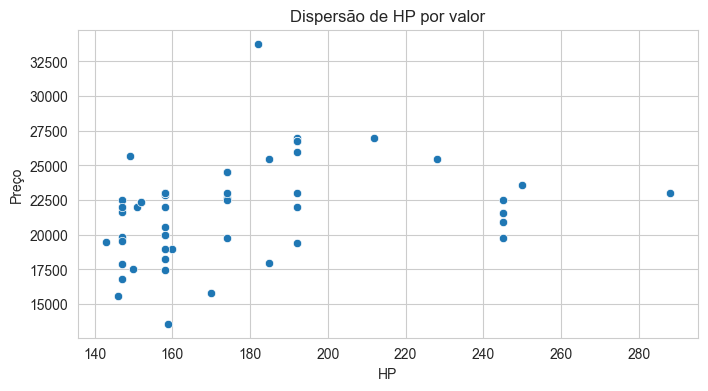

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='horsepower', y='price', ax=ax)
ax.set_title('Dispersão de HP por valor')
ax.set_xlabel('HP')
ax.set_ylabel('Preço')
plt.show()

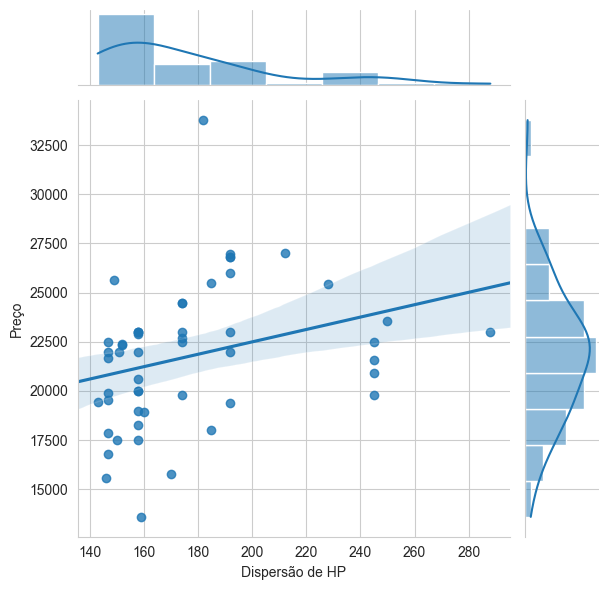

In [25]:
sns.jointplot(x="horsepower", y="price", data=df, kind="reg", truncate=False)
plt.xlabel('Dispersão de HP')
plt.ylabel('Preço')
plt.show()

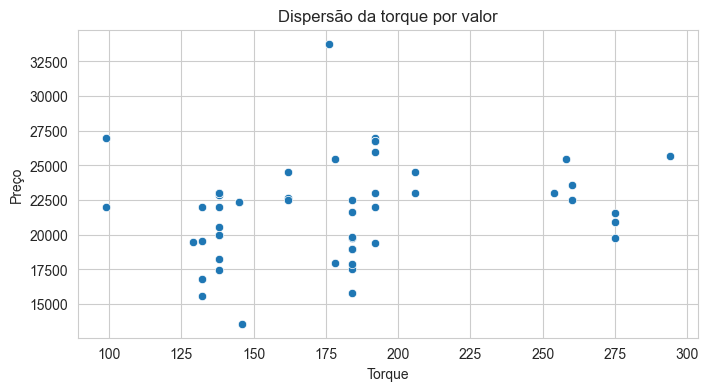

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='torque', y='price', ax=ax)
ax.set_title('Dispersão da torque por valor')
ax.set_xlabel('Torque')
ax.set_ylabel('Preço')
plt.show()

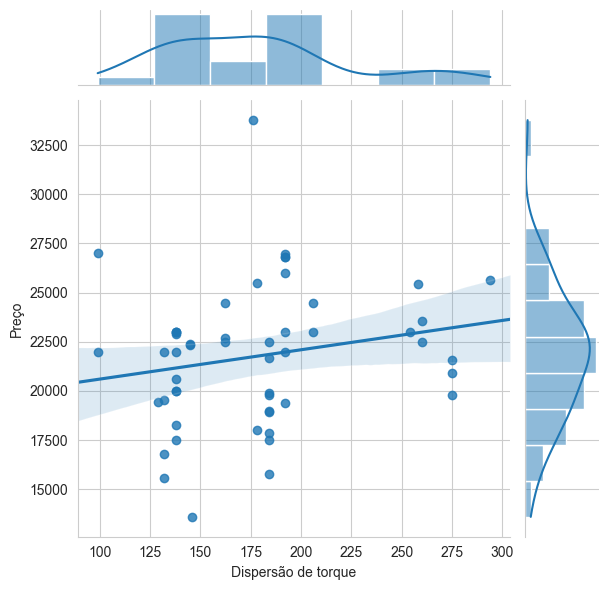

In [27]:
sns.jointplot(x="torque", y="price", data=df, kind="reg", truncate=False)
plt.xlabel('Dispersão de torque')
plt.ylabel('Preço')
plt.show()

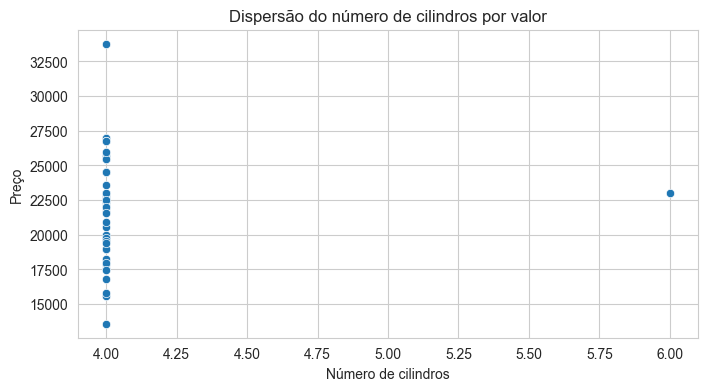

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='num_cylinder', y='price', ax=ax)
ax.set_title('Dispersão do número de cilindros por valor')
ax.set_xlabel('Número de cilindros')
ax.set_ylabel('Preço')
plt.show()

#### Quilometragem

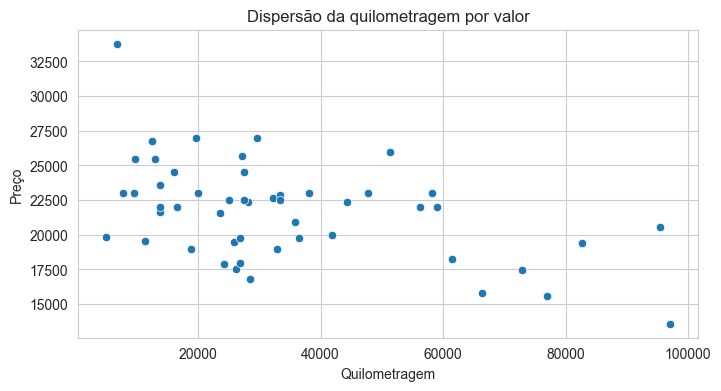

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='miles', y='price', ax=ax)
ax.set_title('Dispersão da quilometragem por valor')
ax.set_xlabel('Quilometragem')
ax.set_ylabel('Preço')
plt.show()

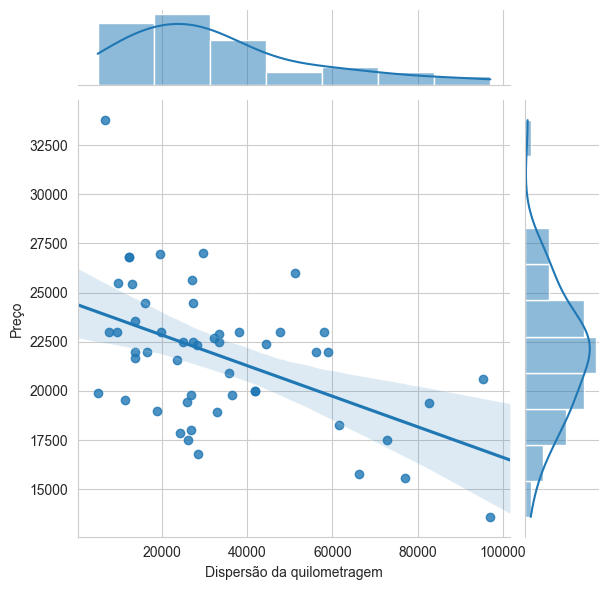

In [30]:
sns.jointplot(x="miles", y="price", data=df, kind="reg", truncate=False)
plt.xlabel('Dispersão da quilometragem')
plt.ylabel('Preço')
plt.show()

#### Consumo

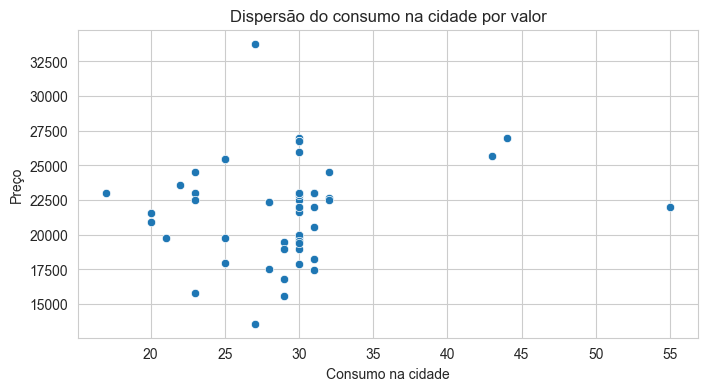

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='city_mileage', y='price', ax=ax)
ax.set_title('Dispersão do consumo na cidade por valor')
ax.set_xlabel('Consumo na cidade')
ax.set_ylabel('Preço')
plt.show()

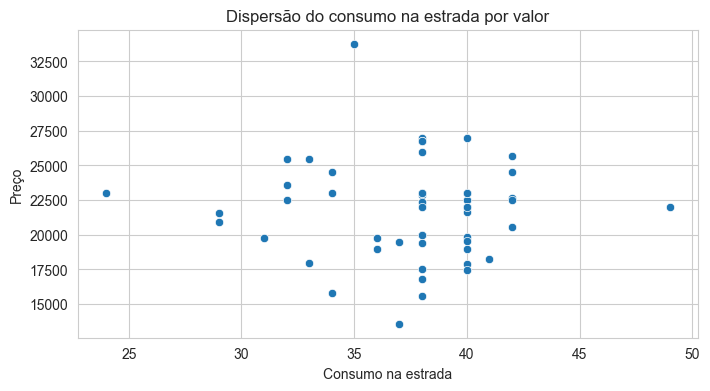

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='highway_mileage', y='price', ax=ax)
ax.set_title('Dispersão do consumo na estrada por valor')
ax.set_xlabel('Consumo na estrada')
ax.set_ylabel('Preço')
plt.show()

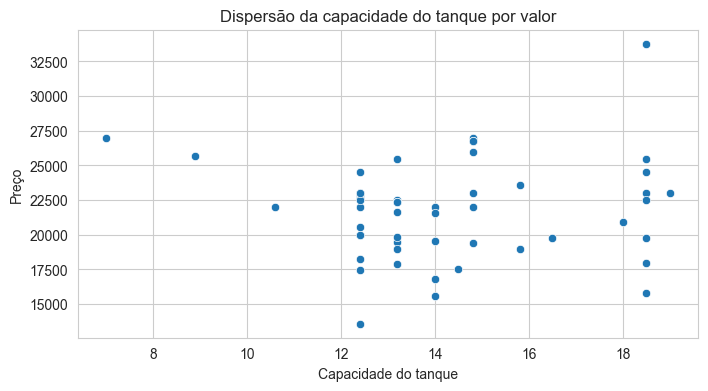

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='fuel_capacity', y='price', ax=ax)
ax.set_title('Dispersão da capacidade do tanque por valor')
ax.set_xlabel('Capacidade do tanque')
ax.set_ylabel('Preço')
plt.show()

#### Registros de serviços

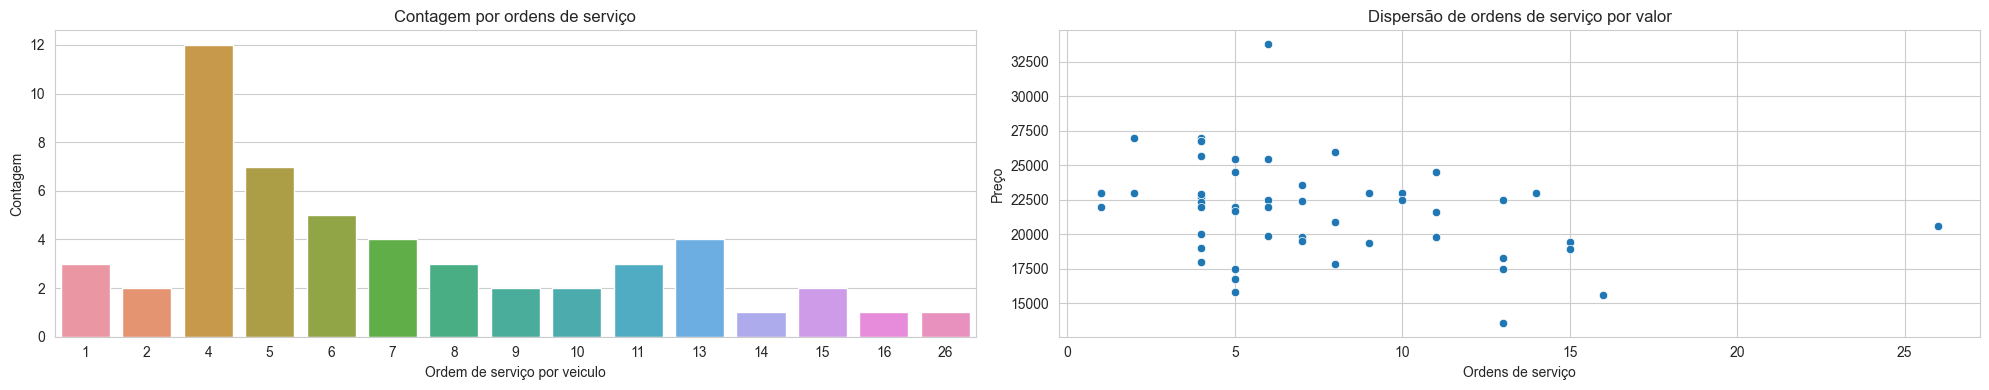

In [34]:
service_records = df.groupby('service_records')['service_records'].value_counts().reset_index(name='count')
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
sns.barplot(x='service_records', y='count', data=service_records, ax=ax[0])
ax[0].set_title('Contagem por ordens de serviço')
ax[0].set_xlabel('Ordem de serviço por veiculo')
ax[0].set_ylabel('Contagem')
sns.scatterplot(data=df, x='service_records', y='price', ax=ax[1])
ax[1].set_title('Dispersão de ordens de serviço por valor')
ax[1].set_xlabel('Ordens de serviço')
ax[1].set_ylabel('Preço')
fig.tight_layout()
plt.show()

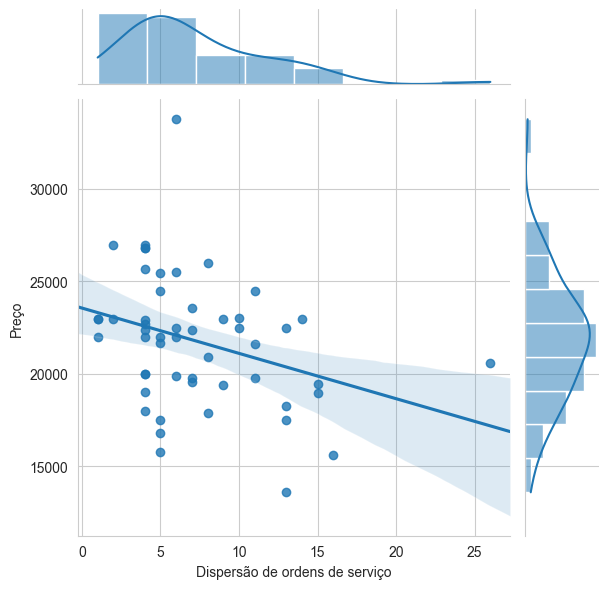

In [35]:
sns.jointplot(x="service_records", y="price", data=df, kind="reg", truncate=False)
plt.xlabel('Dispersão de ordens de serviço')
plt.ylabel('Preço')
plt.show()

#### Número de donos

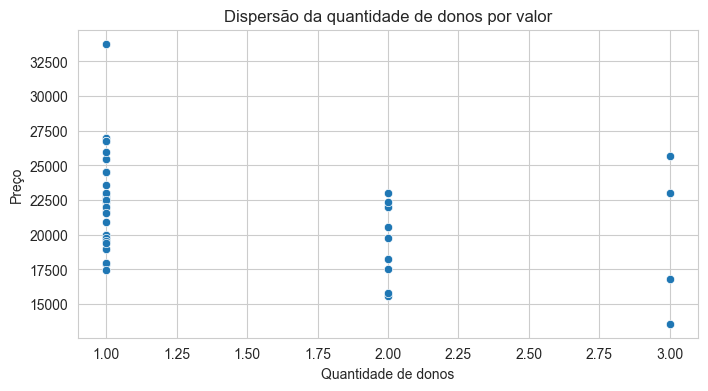

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x='num_owners', y='price', ax=ax)
ax.set_title('Dispersão da quantidade de donos por valor')
ax.set_xlabel('Quantidade de donos')
ax.set_ylabel('Preço')
plt.show()

Será adicionado as seguintes colunas aos resultados do Passo-1
- **brand** não influencia no preço dos veículos
- **Modelo** não influencia no preço dos veículos
- **wheel_drive** não influencia no preço dos veículos
- **engine_type** não influencia no preço dos veículos
- **speed_levels** não influencia no preço dos veículos
- **city_mileage** não influencia no preço dos veículos
- **highway_mileage** não influencia no preço dos veículos
- **torque** não influencia no preço dos veículos
- **engine_capacity_litre** não influencia no preço dos veículos
- **fuel_capacity** não influencia no preço dos veículos
- **num_cylinder** não influencia no preço dos veículos
- **num_owners** não influencia no preço dos veículos


## Passo 3
- Com base em suas análises exploratórias formular hipóteses estatísticas e valide os testes e hipóteses aceitas.

> Hipotes
---
- Modelos de carro interferem no preço
- Idade influencia no preço
- A quilometragem interfere no preço
- Potencia interfere no preço
- Números de dono interfere no preço
- Número de ordens de serviço interfere no valor
- Espaço para as pernas interfere no valor

> Teste de Shapiro-Wilk
---
Teste de hipótese que verifica se uma amostra de dados segue uma distribuição normal. A hipótese nula do teste é que a amostra segue uma distribuição normal. Se o valor-p (valor de probabilidade) do teste for menor do que o nível de significância escolhido (geralmente 0,05), a hipótese nula é rejeitada e conclui-se que a amostra não segue uma distribuição normal.

> Teste não paramétrico Mann-Whitney U
---
O teste de Mann-Whitney U é um teste estatístico que compara duas amostras para determinar se elas têm distribuições diferentes. Ele classifica as observações de cada amostra(ou seja ordená-las em uma determinada ordem com base nos valores que representam), soma as classificações em cada amostra e compara as somas para obter um valor U. Se esse valor for grande o suficiente, podemos concluir que as médias das duas amostras são significativamente diferentes. Em resumo, o teste de Mann-Whitney U é usado para verificar se duas amostras são estatisticamente diferentes entre si, mesmo que elas não sigam uma distribuição normal.

In [37]:
df['brand'] = LabelEncoder().fit_transform(df['brand'])
df['model'] = LabelEncoder().fit_transform(df['model'])

In [38]:
h0 = df.groupby([
        'brand',
        'year',
        'miles',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'num_owners',
        'wheel_drive',
        'speed_levels',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'rear_legroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('model')['price'].sum()

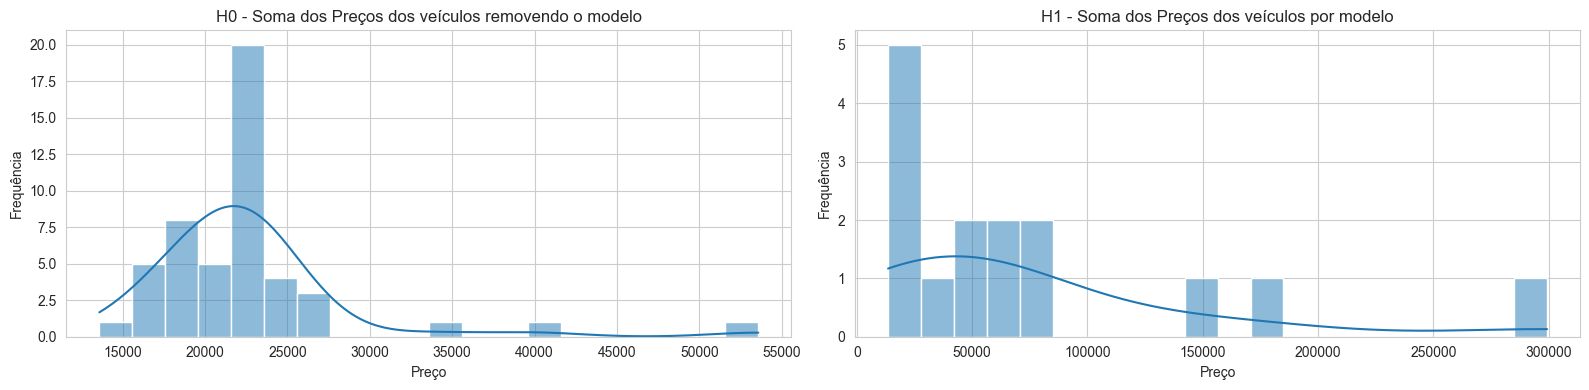

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo o modelo')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos por modelo')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [40]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [41]:
shapiro_w(h1)

Estatística de Teste: 0.7438, valor p: 0.0007617224473506212
A hipótese de normalidade é rejeitada.


In [42]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  100.5
Valor p:  1.1998465024016111e-05
Diferença estatisticamente significante


In [43]:
chi_2(df['model'])

Critical:  68.66929391228578
Estatística de teste U:  16.765500150029137
Valor p:  0.0002287799176053963
Diferença estatisticamente significante


In [44]:
research_py(df['price'], df['model'], 'chi-square')

(      model                                               
model     0   1  2  3  4  5  6  7  8  9 10 11 12 13 14 All
price                                                     
13590     0   0  0  0  1  0  0  0  0  0  0  0  0  0  0   1
15590     0   0  0  1  0  0  0  0  0  0  0  0  0  0  0   1
15795     0   0  0  0  0  0  0  0  0  0  0  1  0  0  0   1
16787     0   0  0  1  0  0  0  0  0  0  0  0  0  0  0   1
17488     0   1  0  0  0  0  0  0  0  0  0  0  0  0  0   1
17500     0   0  0  0  0  0  0  0  1  0  0  0  0  0  0   1
17880     0   0  0  0  0  0  0  0  1  0  0  0  0  0  0   1
17993     0   0  0  0  0  0  0  0  0  0  0  0  1  0  0   1
18277     0   1  0  0  0  0  0  0  0  0  0  0  0  0  0   1
18949     0   0  0  0  0  0  0  0  0  0  1  0  0  0  0   1
18999     0   0  0  0  0  0  0  0  1  0  0  0  0  0  0   1
19403     1   0  0  0  0  0  0  0  0  0  0  0  0  0  0   1
19450     0   1  0  0  0  0  0  0  0  0  0  0  0  0  0   1
19542     0   0  0  1  0  0  0  0  0  0  0  0  0  0  0 

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que os modelos de carro interferem no preço.

In [45]:
h0 = df.groupby([
        'brand',
        'model',
        'miles',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'num_owners',
        'wheel_drive',
        'speed_levels',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'rear_legroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('year')['price'].sum()

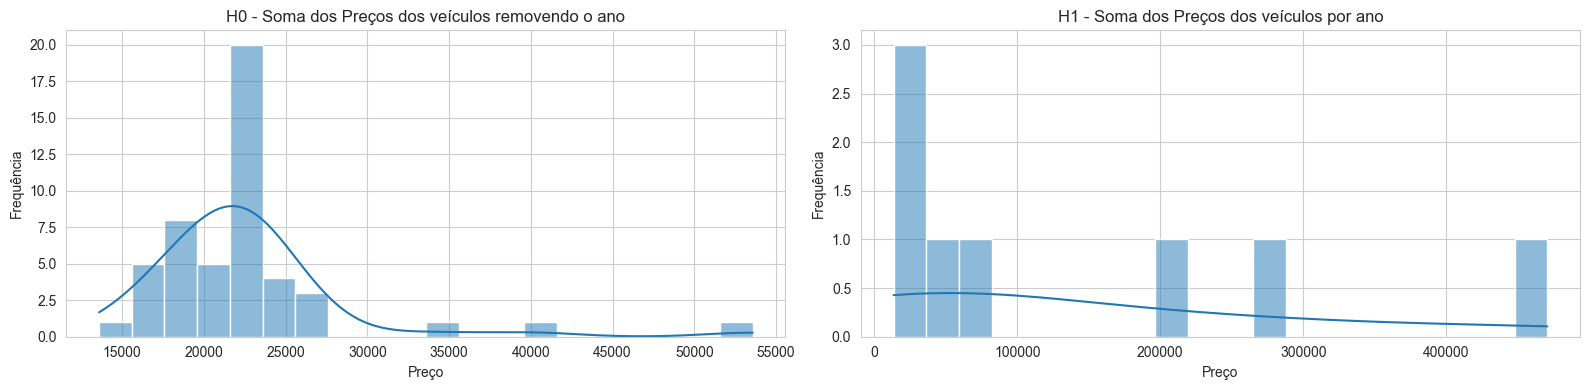

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo o ano')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos por ano')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [47]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [48]:
shapiro_w(h1)

Estatística de Teste: 0.8042, valor p: 0.03176116198301315
A hipótese de normalidade é rejeitada.


In [49]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  89.5
Valor p:  0.007436355413332987
Diferença estatisticamente significante


In [50]:
chi_2(df['year'])

Critical:  68.66929391228578
Estatística de teste U:  14.977274112229317
Valor p:  0.0005594048785944077
Diferença estatisticamente significante


In [51]:
research_py(df['price'], df['year'], 'chi-square')

(      year                                       
year  2014 2015 2016 2017 2018 2019 2020 2022 All
price                                            
13590    1    0    0    0    0    0    0    0   1
15590    0    0    0    1    0    0    0    0   1
15795    0    0    0    1    0    0    0    0   1
16787    0    0    0    0    0    1    0    0   1
17488    0    0    0    0    1    0    0    0   1
17500    0    0    0    1    0    0    0    0   1
17880    0    0    0    0    0    1    0    0   1
17993    0    0    0    0    0    1    0    0   1
18277    0    0    1    0    0    0    0    0   1
18949    0    0    0    0    0    1    0    0   1
18999    0    0    0    0    0    1    0    0   1
19403    0    0    0    0    1    0    0    0   1
19450    0    1    0    0    0    0    0    0   1
19542    0    0    0    0    0    0    1    0   1
19795    0    0    0    0    1    0    1    0   2
19877    0    0    0    0    0    1    0    0   1
19998    0    0    0    0    0    2    0    0   2

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que o ano do carro interfere no preço.

In [52]:
h0 = df.groupby([
        'brand',
        'model',
        'year',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'num_owners',
        'wheel_drive',
        'speed_levels',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'rear_legroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('miles')['price'].sum()

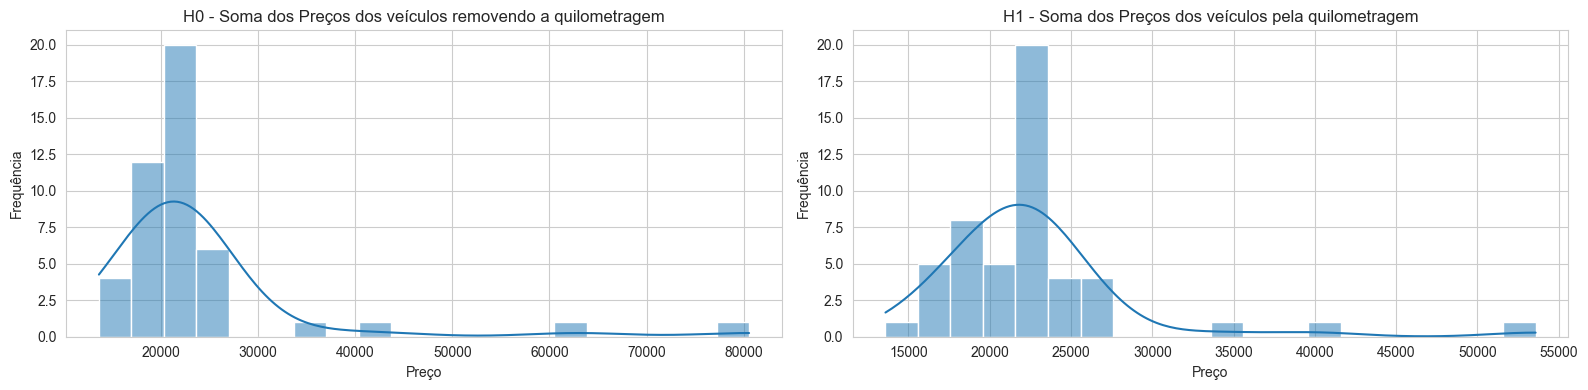

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo a quilometragem')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos pela quilometragem')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [54]:
shapiro_w(h0)

Estatística de Teste: 0.5312, valor p: 6.576829358895253e-11
A hipótese de normalidade é rejeitada.


In [55]:
shapiro_w(h1)

Estatística de Teste: 0.7149, valor p: 1.5472982894948473e-08
A hipótese de normalidade é rejeitada.


In [56]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  1132.5
Valor p:  0.4503780275362132
Não há diferença estatisticamente significante


In [57]:
chi_2(df['miles'])

Critical:  68.66929391228578
Estatística de teste U:  11.66881067619339
Valor p:  0.0029251622255882354
Diferença estatisticamente significante


In [58]:
research_py(df['price'], df['miles'], 'chi-square')

(      miles                                                    ...        \
miles  5000 6811 7743 9495 9736 11296 12395 12944 13721 13726  ... 58126   
price                                                          ...         
13590     0    0    0    0    0     0     0     0     0     0  ...     0   
15590     0    0    0    0    0     0     0     0     0     0  ...     0   
15795     0    0    0    0    0     0     0     0     0     0  ...     0   
16787     0    0    0    0    0     0     0     0     0     0  ...     0   
17488     0    0    0    0    0     0     0     0     0     0  ...     0   
17500     0    0    0    0    0     0     0     0     0     0  ...     0   
17880     0    0    0    0    0     0     0     0     0     0  ...     0   
17993     0    0    0    0    0     0     0     0     0     0  ...     0   
18277     0    0    0    0    0     0     0     0     0     0  ...     0   
18949     0    0    0    0    0     0     0     0     0     0  ...     0   
18999     0

Os dados não seguem uma distribuição normal.
Não podemos confirmar que a quilometragem do carro interferem no preço.

In [59]:
h0 = df.groupby([
        'brand',
        'model',
        'year',
        'miles',
        'city_mileage',
        'highway_mileage',
        'torque',
        'fuel_capacity',
        'num_owners',
        'wheel_drive',
        'speed_levels',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'rear_legroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('horsepower')['price'].sum()

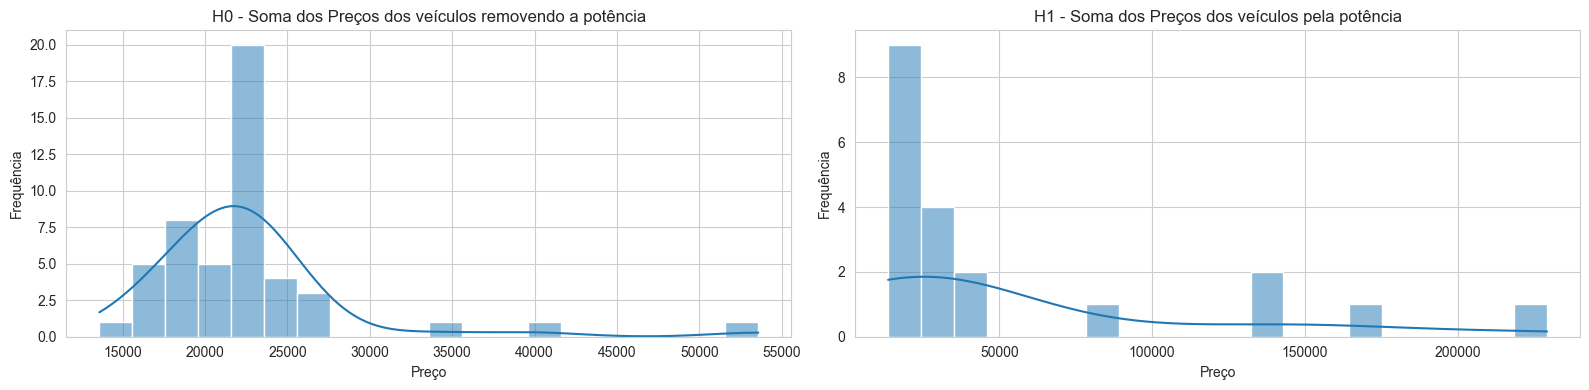

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo a potência')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos pela potência')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [61]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [62]:
shapiro_w(h1)

Estatística de Teste: 0.6951, valor p: 3.39984726451803e-05
A hipótese de normalidade é rejeitada.


In [63]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  332.0
Valor p:  0.018608268450179374
Diferença estatisticamente significante


In [64]:
chi_2(df['horsepower'])

Critical:  68.66929391228578
Estatística de teste U:  18.35099875852103
Valor p:  0.00010354550508133834
Diferença estatisticamente significante


In [65]:
research_py(df['price'], df['horsepower'], 'chi-square')

(           horsepower                                      ...              \
horsepower        143 146 147 149 150 151 152 158 159 160  ... 174 182 185   
price                                                      ...               
13590               0   0   0   0   0   0   0   0   1   0  ...   0   0   0   
15590               0   1   0   0   0   0   0   0   0   0  ...   0   0   0   
15795               0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
16787               0   0   1   0   0   0   0   0   0   0  ...   0   0   0   
17488               0   0   0   0   0   0   0   1   0   0  ...   0   0   0   
17500               0   0   0   0   1   0   0   0   0   0  ...   0   0   0   
17880               0   0   1   0   0   0   0   0   0   0  ...   0   0   0   
17993               0   0   0   0   0   0   0   0   0   0  ...   0   0   1   
18277               0   0   0   0   0   0   0   1   0   0  ...   0   0   0   
18949               0   0   0   0   0   0   0   0   0   1  ... 

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que a potência do carro interfere no preço.

In [66]:
h0 = df.groupby([
        'brand',
        'model',
        'year',
        'miles',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'wheel_drive',
        'speed_levels',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'rear_legroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('num_owners')['price'].sum()

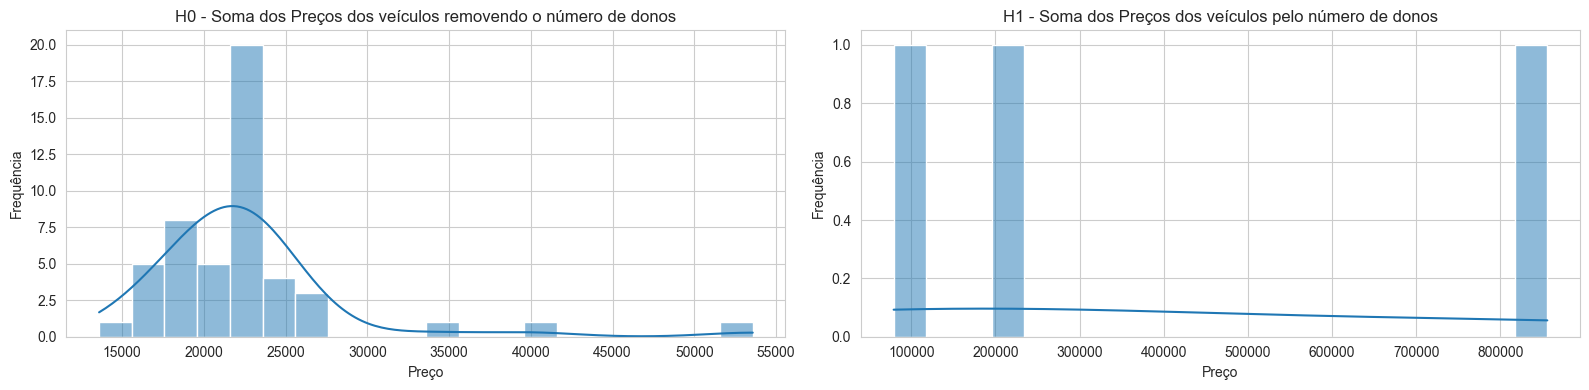

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo o número de donos')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos pelo número de donos')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [68]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [69]:
shapiro_w(h1)

Estatística de Teste: 0.8608, valor p: 0.26984933018684387
Não há evidência suficiente para rejeitar a hipótese de normalidade.


In [70]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  0.0
Valor p:  0.0020841748011464377
Diferença estatisticamente significante


In [71]:
chi_2(df['num_owners'])

Critical:  68.66929391228578
Estatística de teste U:  20.04740707295169
Valor p:  4.4336444841626714e-05
Diferença estatisticamente significante


In [72]:
research_py(df['price'], df['num_owners'], 'chi-square')

(           num_owners           
num_owners          1   2  3 All
price                           
13590               0   0  1   1
15590               0   1  0   1
15795               0   1  0   1
16787               0   0  1   1
17488               1   0  0   1
17500               0   1  0   1
17880               1   0  0   1
17993               1   0  0   1
18277               0   1  0   1
18949               1   0  0   1
18999               1   0  0   1
19403               1   0  0   1
19450               1   0  0   1
19542               1   0  0   1
19795               1   1  0   2
19877               1   0  0   1
19998               2   0  0   2
20590               0   1  0   1
20900               1   0  0   1
21591               1   0  0   1
21680               1   0  0   1
21988               1   0  0   1
21994               0   1  0   1
21998               0   1  0   1
21999               1   0  0   1
22360               1   0  0   1
22388               0   1  0   1
22476    

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que o número de donos do carro interfere no preço.

In [73]:
h0 = df.groupby([
        'brand',
        'model',
        'year',
        'miles',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'num_owners',
        'wheel_drive',
        'speed_levels',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'rear_legroom'
    ])['price'].sum()
h1 = df.groupby('service_records')['price'].sum()

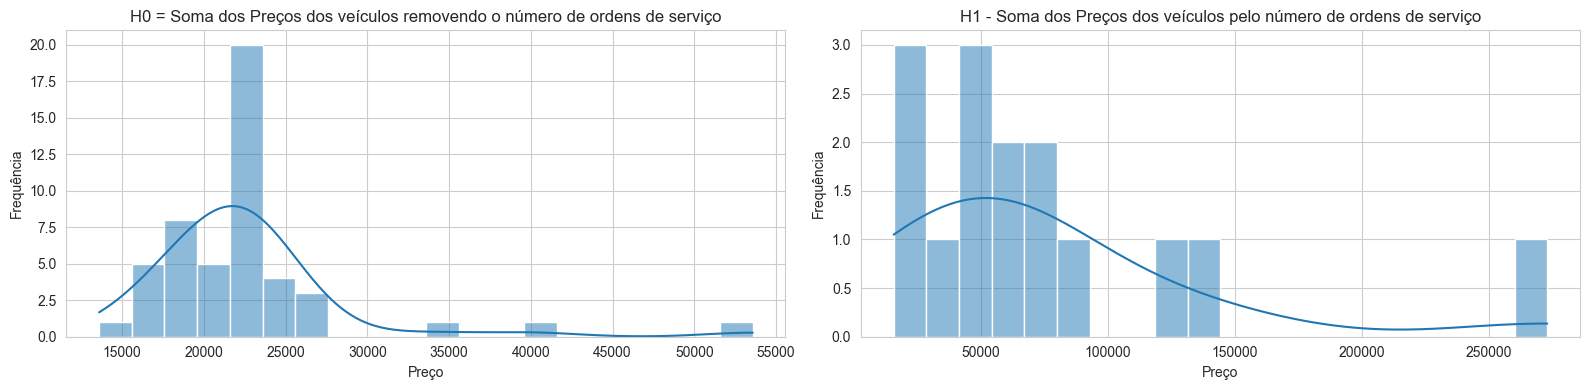

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 = Soma dos Preços dos veículos removendo o número de ordens de serviço')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos pelo número de ordens de serviço')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [75]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [76]:
shapiro_w(h1)

Estatística de Teste: 0.7652, valor p: 0.001361339003778994
A hipótese de normalidade é rejeitada.


In [77]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  98.5
Valor p:  1.0422816393056976e-05
Diferença estatisticamente significante


In [78]:
chi_2(df['service_records'])

Critical:  68.66929391228578
Estatística de teste U:  23.32845916478141
Valor p:  8.595862437535975e-06
Diferença estatisticamente significante


In [79]:
research_py(df['price'], df['service_records'], 'chi-square')

(                service_records                                               
service_records               1  2   4  5  6  7  8  9 10 11 13 14 15 16 26 All
price                                                                         
13590                         0  0   0  0  0  0  0  0  0  0  1  0  0  0  0   1
15590                         0  0   0  0  0  0  0  0  0  0  0  0  0  1  0   1
15795                         0  0   0  1  0  0  0  0  0  0  0  0  0  0  0   1
16787                         0  0   0  1  0  0  0  0  0  0  0  0  0  0  0   1
17488                         0  0   0  1  0  0  0  0  0  0  0  0  0  0  0   1
17500                         0  0   0  0  0  0  0  0  0  0  1  0  0  0  0   1
17880                         0  0   0  0  0  0  1  0  0  0  0  0  0  0  0   1
17993                         0  0   1  0  0  0  0  0  0  0  0  0  0  0  0   1
18277                         0  0   0  0  0  0  0  0  0  0  1  0  0  0  0   1
18949                         0  0   0  0  0  0  0 

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que o número de ordens de serviço do carro interfere no preço.

In [80]:
h0 = df.groupby([
        'brand',
        'model',
        'year',
        'miles',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'wheel_drive',
        'speed_levels',
        'num_owners',
        'front_headroom',
        'front_legroom',
        'rear_headroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('rear_legroom')['price'].sum()

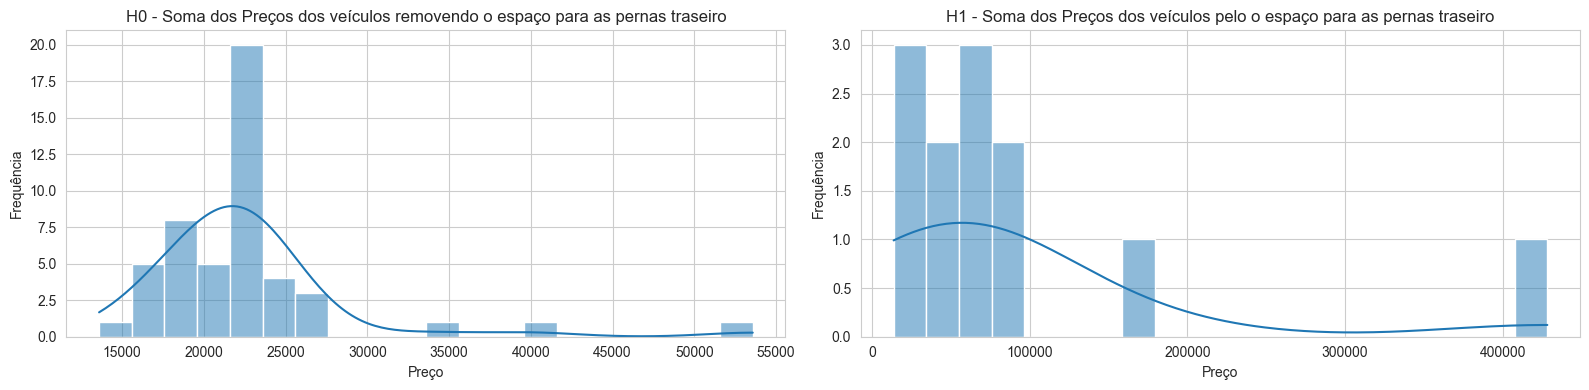

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo o espaço para as pernas traseiro')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos pelo o espaço para as pernas traseiro')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [82]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [83]:
shapiro_w(h1)

Estatística de Teste: 0.6263, valor p: 0.00017933337949216366
A hipótese de normalidade é rejeitada.


In [84]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  58.5
Valor p:  1.0043842273395878e-05
Diferença estatisticamente significante


In [85]:
chi_2(df['rear_legroom'])

Critical:  68.66929391228578
Estatística de teste U:  0.3107546525442304
Valor p:  0.8560920904957483
Não há diferença estatisticamente significante


In [86]:
research_py(df['price'], df['rear_legroom'], 'chi-square')

(             rear_legroom                                                    \
rear_legroom         33.2 34.7 35.6 35.7 36.2 36.5 37.4 38.1 38.3 39.1 39.5   
price                                                                         
13590                   1    0    0    0    0    0    0    0    0    0    0   
15590                   0    0    0    1    0    0    0    0    0    0    0   
15795                   0    0    0    0    0    0    0    0    0    1    0   
16787                   0    0    0    1    0    0    0    0    0    0    0   
17488                   0    0    0    0    0    0    1    0    0    0    0   
17500                   0    0    0    0    0    0    0    1    0    0    0   
17880                   0    0    0    0    0    0    1    0    0    0    0   
17993                   0    0    1    0    0    0    0    0    0    0    0   
18277                   0    0    0    0    0    0    1    0    0    0    0   
18949                   0    0    0    0    0    0 

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que o espaço para as pernas traseiro do carro interfere no preço.

In [87]:
h0 = df.groupby([
        'brand',
        'model',
        'year',
        'miles',
        'city_mileage',
        'highway_mileage',
        'horsepower',
        'torque',
        'fuel_capacity',
        'wheel_drive',
        'speed_levels',
        'num_owners',
        'front_headroom',
        'rear_headroom',
        'rear_legroom',
        'service_records'
    ])['price'].sum()
h1 = df.groupby('front_legroom')['price'].sum()

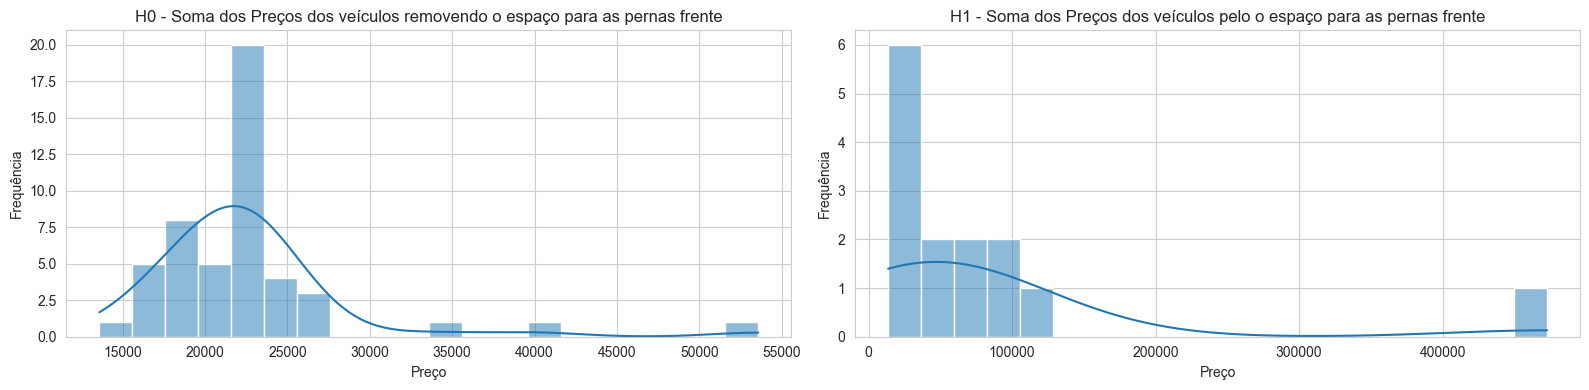

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=h0, kde=True, bins=20, ax=axes[0]) # type:ignore
axes[0].set_title('H0 - Soma dos Preços dos veículos removendo o espaço para as pernas frente')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')
sns.histplot(data=h1, kde=True, bins=20, ax=axes[1]) # type:ignore
axes[1].set_title('H1 - Soma dos Preços dos veículos pelo o espaço para as pernas frente')
axes[1].set_xlabel('Preço')
axes[1].set_ylabel('Frequência')
fig.tight_layout()
plt.show()

In [89]:
shapiro_w(h0)

Estatística de Teste: 0.7026, valor p: 1.1641708042020582e-08
A hipótese de normalidade é rejeitada.


In [90]:
shapiro_w(h1)

Estatística de Teste: 0.5512, valor p: 1.5394414731417783e-05
A hipótese de normalidade é rejeitada.


In [91]:
mannwhitney_u(h0.sample(len(h0)), h1.sample(len(h1)), alternative="less")

Estatística de teste U:  155.0
Valor p:  0.0009670188012540308
Diferença estatisticamente significante


In [92]:
chi_2(df['model'])

Critical:  68.66929391228578
Estatística de teste U:  16.765500150029137
Valor p:  0.0002287799176053963
Diferença estatisticamente significante


In [93]:
research_py(df['price'], df['front_legroom'], 'chi-square')

(              front_legroom                                                    \
front_legroom          41.1 41.2 41.5 41.9 42.0 42.1 42.2 42.3 42.4 42.8 43.1   
price                                                                           
13590                     0    0    0    0    0    0    0    0    0    0    0   
15590                     0    0    0    0    0    0    1    0    0    0    0   
15795                     0    0    0    0    0    0    0    0    1    0    0   
16787                     0    0    0    0    0    0    1    0    0    0    0   
17488                     0    0    0    0    0    0    0    1    0    0    0   
17500                     0    1    0    0    0    0    0    0    0    0    0   
17880                     1    0    0    0    0    0    0    0    0    0    0   
17993                     0    0    0    0    0    0    0    0    0    0    0   
18277                     0    0    0    0    0    0    0    1    0    0    0   
18949                     0

Os dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
O p-valor menor do que 0.05, podemos confirmar que o espaço para as pernas da frente do carro interfere no preço.

> Resultado da hipóteses
---
- Modelos de carro interferem no preço
- Idade influencia no preço
- A quilometragem interfere no preço
- Potencia interfere no preço
- Números de dono interfere no preço
- Número de ordens de serviço interfere no valor
- Espaço para as pernas interfere no valor
---
- Pode-se comprovar estatisticamente que a quilometragem do veiculo é a única informação que nao afeta o seu valor.

## Passo 4
- Realizar análise de correlação entre as variáveis.

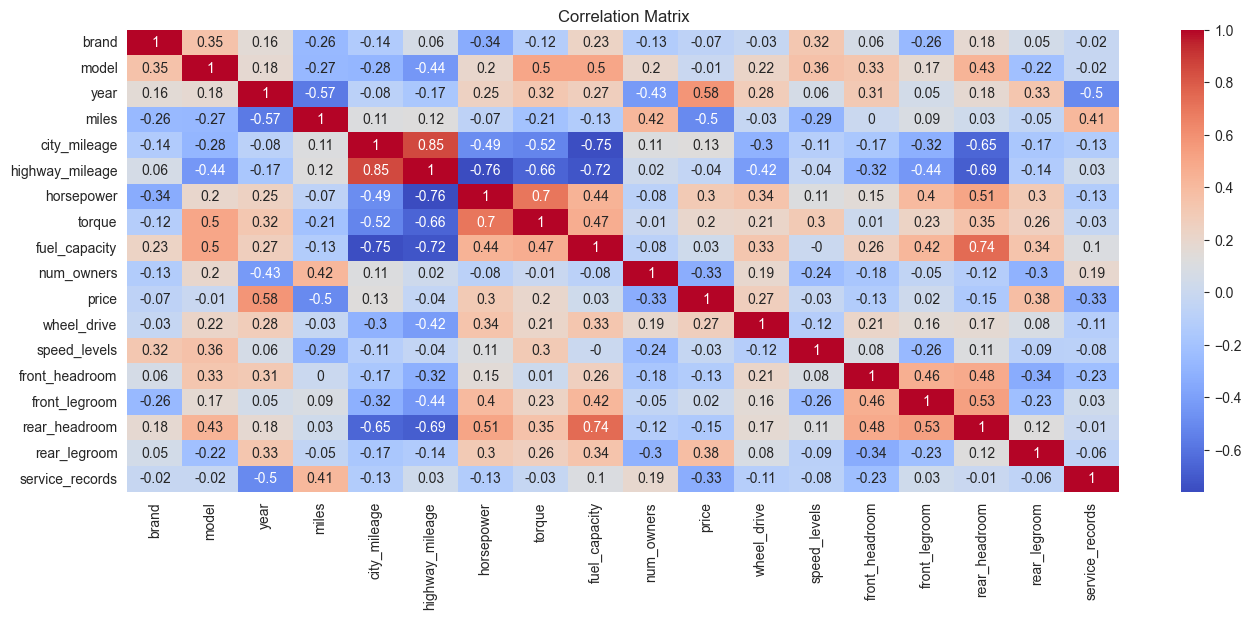

Relevant features based on correlation:
['year', 'miles', 'rear_legroom']


In [94]:
corr_matrix = df[[
                'brand',
                'model',
                'year',
                'miles',
                'city_mileage',
                'highway_mileage',
                'horsepower',
                'torque',
                'fuel_capacity',
                'num_owners',
                'price',
                'wheel_drive',
                'speed_levels',
                'front_headroom',
                'front_legroom',
                'rear_headroom',
                'rear_legroom',
                'service_records'
            ]].corr().round(2)

plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

threshold = 0.38
relevant_features = corr_matrix[(corr_matrix['price'].abs() >= threshold) & (corr_matrix.index != 'price')].index.tolist()
print("Relevant features based on correlation:") 
print(relevant_features)

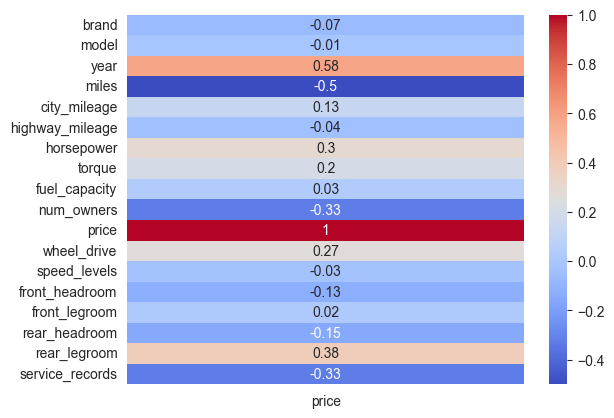

In [95]:
sns.heatmap(corr_matrix['price'].to_frame(), annot=True, cmap='coolwarm') #type: ignore
plt.show()

Analisando as correlações:

Correlação de Pearson - quando as variáveis são numéricas quantitativas
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

> Resultado
---
Com analises anteriores considera-se as variáveis que afetam o preço dos veículos positiva ou negativamente.

## Passo 5
- Construir um modelo de regressão apontar variável target e variáveis independentes.

In [96]:
predictor = df[['year', 'miles', 'rear_legroom']]
target = df['price']

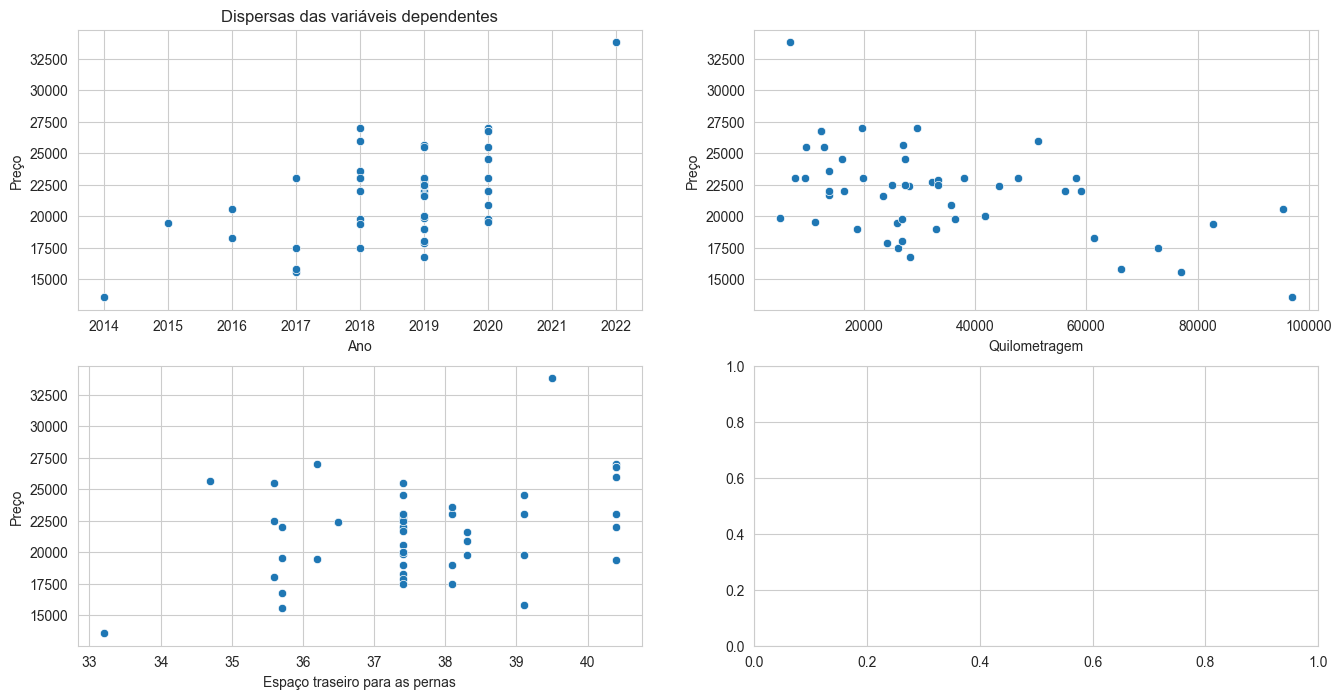

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(data=predictor, x='year', y=target, ax=ax[0][0])
ax[0][0].set_title('Dispersas das variáveis dependentes')
ax[0][0].set_xlabel('Ano')
ax[0][0].set_ylabel('Preço')
sns.scatterplot(data=predictor, x='miles', y=target, ax=ax[0][1])
ax[0][1].set_xlabel('Quilometragem')
ax[0][1].set_ylabel('Preço')
sns.scatterplot(data=predictor, x='rear_legroom', y=target, ax=ax[1][0])
ax[1][0].set_xlabel('Espaço traseiro para as pernas')
ax[1][0].set_ylabel('Preço')
plt.show()

In [98]:
x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state = 42)

In [99]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

A função LinearRegression() busca encontrar a melhor linha de regressão que minimize a soma dos quadrados das diferenças entre os valores observados e os valores previstos. O modelo utiliza o método dos mínimos quadrados para estimar os coeficientes da equação linear. 

In [100]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_scaled, y_train)
y_lr_pred = linear_regression_model.predict(x_test_scaled)

In [101]:
linear_regression_mae = mean_absolute_error(y_test, y_lr_pred)
linear_regression_mse = mean_squared_error(y_test, y_lr_pred)
linear_regression_r2 = r2_score(y_test, y_lr_pred)
print('Média do valor absoluto dos erros: ', linear_regression_mae)
print('Média dos erros quadráticos', linear_regression_mse)
print('Coeficiente de determinação (R²):', linear_regression_r2)

Média do valor absoluto dos erros:  2634.8801742037367
Média dos erros quadráticos 11144795.884942338
Coeficiente de determinação (R²): 0.3072546588385372


Modelo de regressão linear regularizado, que utiliza a técnica L2 para evitar o overfitting e melhorar a generalização do modelo. O hiperparâmetro alpha controla o nível de regularização, com valores maiores aumentando a penalidade sobre os coeficientes. O hiperparâmetro fit_intercept define se o modelo deve ajustar a interceptação. O hiperparâmetro solver determina o método usado para resolver o problema de otimização.

In [102]:
ridge_model = Ridge(random_state=42)

ridge_parameters = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 90.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

ridge_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

ridge_grid_search = GridSearchCV(
                        ridge_model,
                        ridge_parameters,
                        scoring=ridge_scoring,
                        cv=9,
                        refit='R-squared',
                        n_jobs=-1
                    )

ridge_grid_search.fit(x_train_scaled, y_train)

# results = grid_search.cv_results_
# for i in range(len(results['params'])):
#     params = results['params'][i]
#     r2 = results['mean_test_R-squared'][i]
#     print("Parâmetros:", params)
#     print("R-squared:", r2)
#     print("---")

ridge_best_params = ridge_grid_search.best_params_
print("Melhores parâmetros encontrados:", ridge_best_params)

ridge_best_model = ridge_grid_search.best_estimator_
y_ridge_pred = ridge_grid_search.predict(x_test_scaled) # type:ignore

ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print('Média do valor absoluto dos erros: ', ridge_mae)
print('Média dos erros quadráticos', ridge_mse)
print('Coeficiente de determinação (R²):', ridge_r2)

Melhores parâmetros encontrados: {'alpha': 1.0, 'fit_intercept': True, 'solver': 'saga'}
Média do valor absoluto dos erros:  2629.7145724100433
Média dos erros quadráticos 11122199.699642042
Coeficiente de determinação (R²): 0.3086592069573548


Modelo de regressão linear regularizado, que utiliza a técnica L1 para evitar o overfitting e promover a seleção de recursos relevantes, forçando alguns coeficientes a serem exatamente iguais a zero. O hiperparâmetro alpha controla o nível de regularização, com valores maiores aumentando a penalidade sobre os coeficientes. O hiperparâmetro fit_intercept determina se o modelo deve ajustar a interceptação. O hiperparâmetro selection indica o método usado para selecionar os atributos durante o ajuste.

In [103]:
lasso_model = Lasso(random_state=42)

lasso_parameters = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 90.0, 100.0, 130.0, 140.0],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

lasso_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

lasso_grid_search = GridSearchCV(
                        lasso_model,
                        lasso_parameters,
                        scoring=lasso_scoring,
                        cv=20,
                        refit='R-squared'
                    )

lasso_grid_search.fit(x_train_scaled, y_train)

lasso_best_params = lasso_grid_search.best_params_
print("Melhores parâmetros encontrados:", lasso_best_params)

lasso_best_model = lasso_grid_search.best_estimator_
y_lasso_pred = lasso_best_model.predict(x_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_lasso_pred)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print('Média do valor absoluto dos erros: ', lasso_mae)
print('Média dos erros quadráticos', lasso_mse)
print('Coeficiente de determinação (R²):', lasso_r2)

Melhores parâmetros encontrados: {'alpha': 0.01, 'fit_intercept': True, 'selection': 'cyclic'}
Média do valor absoluto dos erros:  2634.8803367271594
Média dos erros quadráticos 11144805.786158638
Coeficiente de determinação (R²): 0.30725404339241025


Modelo de regressão linear regularizado que combina as penalidades L1 (lasso) e L2 (ridge) para evitar o overfitting e obter uma melhor seleção de recursos. O hiperparâmetro alpha controla o nível de regularização, onde valores maiores aumentam a penalidade sobre os coeficientes. O hiperparâmetro l1_ratio determina a proporção da penalidade L1 na combinação das duas penalidades. Valores próximos de 1.0 enfatizam a penalidade lasso, enquanto valores próximos de 0.0 enfatizam a penalidade ridge. O hiperparâmetro fit_intercept define se o modelo deve ajustar a interceptação. 

In [104]:
elasticnet_model = ElasticNet(random_state=42)

elasticnet_parameters = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 90.0],
    'l1_ratio': [0.01, 0.1, 0.5, 0.9],
    'fit_intercept': [True, False]
}

elasticnet_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

elasticnet_grid_search = GridSearchCV(
                            elasticnet_model,
                            elasticnet_parameters,
                            scoring=elasticnet_scoring,
                            cv=12,
                            refit='R-squared',
                            n_jobs=-1
                        )

elasticnet_grid_search.fit(x_train_scaled, y_train)

elasticnet_best_params = elasticnet_grid_search.best_params_
print("Melhores parâmetros encontrados:", elasticnet_best_params)

elasticnet_best_model = elasticnet_grid_search.best_estimator_
y_elasticnet_pred = elasticnet_best_model.predict(x_test_scaled)

elasticnet_mae = mean_absolute_error(y_test, y_elasticnet_pred)
elasticnet_mse = mean_squared_error(y_test, y_elasticnet_pred)
elasticnet_r2 = r2_score(y_test, y_elasticnet_pred)

print('Média do valor absoluto dos erros: ', elasticnet_mae)
print('Média dos erros quadráticos', elasticnet_mse)
print('Coeficiente de determinação (R²):', elasticnet_r2)

Melhores parâmetros encontrados: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01}
Média do valor absoluto dos erros:  2618.0825654318933
Média dos erros quadráticos 11093540.091311412
Coeficiente de determinação (R²): 0.31044064919779824


Modelo de regressão linear regularizado baseado na abordagem bayesiana. Ele utiliza priors (distribuições de probabilidade iniciais) para os coeficientes do modelo, permitindo incorporar informações prévias sobre os dados. Os hiperparâmetros alpha_1, alpha_2, lambda_1 e lambda_2 controlam a precisão das priors para os coeficientes e para a precisão do ruído do modelo. Valores menores indicam priors mais informativas, enquanto valores maiores tornam as priors menos informativas. O hiperparâmetro fit_intercept define se o modelo deve ajustar a interceptação.

In [105]:
bayesianridge_model = BayesianRidge()

bayesianridge_parameters = {'alpha_1': [1e-6, 1e-4, 1e-2],
              'alpha_2': [1e-6, 1e-4, 1e-2],
              'lambda_1': [1e-6, 1e-4, 1e-2],
              'lambda_2': [1e-6, 1e-4, 1e-2],
              'fit_intercept': [True, False]}

bayesianridge_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

bayesianridge_grid_search = GridSearchCV(
                                bayesianridge_model,
                                bayesianridge_parameters,
                                scoring=bayesianridge_scoring,
                                cv=2,
                                refit='R-squared',
                                n_jobs=-1
                            )

bayesianridge_grid_search.fit(x_train_scaled, y_train)

bayesianridge_best_params = bayesianridge_grid_search.best_params_
print("Melhores parâmetros encontrados:", bayesianridge_best_params)

bayesianridge_best_model = bayesianridge_grid_search.best_estimator_
y_bayesianridge_pred = bayesianridge_best_model.predict(x_test_scaled)

bayesianridge_mae = mean_absolute_error(y_test, y_bayesianridge_pred) # type: ignore
bayesianridge_mse = mean_squared_error(y_test, y_bayesianridge_pred) # type: ignore
bayesianridge_r2 = r2_score(y_test, y_bayesianridge_pred) # type: ignore

print('Média do valor absoluto dos erros: ', bayesianridge_mae)
print('Média dos erros quadráticos', bayesianridge_mse)
print('Coeficiente de determinação (R²):', bayesianridge_r2)

Melhores parâmetros encontrados: {'alpha_1': 1e-06, 'alpha_2': 0.01, 'fit_intercept': True, 'lambda_1': 0.0001, 'lambda_2': 0.01}
Média do valor absoluto dos erros:  2611.8643241855207
Média dos erros quadráticos 11092736.237594372
Coeficiente de determinação (R²): 0.31049061565058955


Modelo de regressão linear baseado no algoritmo Stochastic Gradient Descent (SGD), que é um otimizador eficiente para grandes conjuntos de dados. Capaz de lidar com diferentes tipos de penalidades para controlar o overfitting, através do hiperparâmetro penalty. As opções disponíveis para penalty são 'l1' para L1 (lasso), 'l2' para L2 (ridge) e 'elasticnet' para uma combinação das duas penalidades. O hiperparâmetro alpha controla a força da regularização, com valores maiores aplicando uma penalidade mais forte aos coeficientes. O hiperparâmetro l1_ratio é relevante apenas quando a penalidade 'elasticnet' é usada, ajustando a proporção entre as penalidades L1 e L2. O hiperparâmetro fit_intercept define se o modelo deve ajustar a interceptação.

In [106]:
sgd_model = SGDRegressor(random_state=42)

sgd_parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9],
    'l1_ratio': [0.15, 0.5, 0.85],
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2', 'elasticnet']
}

sgd_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

sgd_grid_search = GridSearchCV(
                        sgd_model,
                        sgd_parameters,
                        scoring=sgd_scoring,
                        cv=7,
                        refit='R-squared',
                        n_jobs=-1
                    )

sgd_grid_search.fit(x_train_scaled, y_train)

sgd_best_params = sgd_grid_search.best_params_
print("Melhores parâmetros encontrados:", sgd_best_params)

sgd_best_model = sgd_grid_search.best_estimator_
y_sgd_pred = sgd_best_model.predict(x_test_scaled)

sgd_mae = mean_absolute_error(y_test, y_sgd_pred)
sgd_mse = mean_squared_error(y_test, y_sgd_pred)
sgd_r2 = r2_score(y_test, y_sgd_pred)

print('Média do valor absoluto dos erros: ', sgd_mae)
print('Média dos erros quadráticos', sgd_mse)
print('Coeficiente de determinação (R²):', sgd_r2)

Melhores parâmetros encontrados: {'alpha': 0.9, 'fit_intercept': True, 'l1_ratio': 0.85, 'penalty': 'elasticnet'}
Média do valor absoluto dos erros:  2632.6287152555938
Média dos erros quadráticos 11131089.026211191
Coeficiente de determinação (R²): 0.30810665851856633


Modelo de regressão baseado no algoritmo k-vizinhos mais próximos (k-nearest neighbors, KNN). Estima o valor de uma instância desconhecida ao calcular a média ou mediana dos valores dos k vizinhos mais próximos no conjunto de treinamento. O hiperparâmetro n_neighbors determina o número de vizinhos considerados para fazer a previsão. O hiperparâmetro weights define como os vizinhos são ponderados para fazer a previsão, sendo 'uniform' uma ponderação igualitária e 'distance' uma ponderação inversamente proporcional à distância. O hiperparâmetro algorithm define o algoritmo utilizado para calcular os vizinhos mais próximos, onde 'auto' seleciona o algoritmo mais apropriado com base nos dados, 'ball_tree' utiliza a estrutura de árvore de esferas, 'kd_tree' utiliza a estrutura de árvore de k-dimensional e 'brute' realiza uma busca exaustiva. O hiperparâmetro metric especifica a métrica de distância utilizada para medir a proximidade entre as instâncias, podendo ser 'euclidean' (euclidiana), 'manhattan' (manhattan) ou 'chebyshev' (chebyshev).

In [107]:
knn_model = KNeighborsRegressor()

knn_parameters = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

knn_grid_search = GridSearchCV(
                        knn_model,
                        knn_parameters,
                        scoring=knn_scoring,
                        cv=3,
                        refit='R-squared',
                        n_jobs=-1
                    )

knn_grid_search.fit(x_train_scaled, y_train)

knn_best_params = knn_grid_search.best_params_
print("Melhores parâmetros encontrados:", knn_best_params)

knn_best_model = knn_grid_search.best_estimator_
y_knn_pred = knn_best_model.predict(x_test_scaled)

knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)

print('Média do valor absoluto dos erros: ', knn_mae)
print('Média dos erros quadráticos', knn_mse)
print('Coeficiente de determinação (R²):', knn_r2)

Melhores parâmetros encontrados: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Média do valor absoluto dos erros:  2352.091419682668
Média dos erros quadráticos 10727478.588005174
Coeficiente de determinação (R²): 0.33319453393574827


Modelo de regressão baseado na árvore de decisão que divide o conjunto de dados em subconjuntos menores e constrói uma árvore onde cada nó representa uma decisão baseada em um atributo, levando ao valor previsto para a variável alvo (valor de regressão) nas folhas da árvore. O hiperparâmetro criterion define a medida usada para avaliar a qualidade da divisão dos nós da árvore, onde 'squared_error' representa o erro quadrado médio, 'friedman_mse' usa uma versão modificada do erro quadrado médio e 'poisson' aplica a regressão de Poisson para problemas de contagem, enquanto 'mae' usa o erro médio absoluto. O hiperparâmetro max_depth limita a profundidade máxima da árvore, o que pode ajudar a evitar overfitting. O hiperparâmetro min_samples_split define o número mínimo de amostras necessárias para dividir um nó interno, enquanto min_samples_leaf define o número mínimo de amostras necessárias para ser uma folha da árvore. 

In [108]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_parameters = {
    'criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error', 'mae'],
    'max_depth': [None, 5, 10, 15, 30],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6]
}

dt_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

dt_grid_search = GridSearchCV(
                    dt_model,
                    dt_parameters,
                    scoring=dt_scoring,
                    cv=3,
                    refit='R-squared'
                )

dt_grid_search.fit(x_train_scaled, y_train)

dt_best_params = dt_grid_search.best_params_
print("Melhores parâmetros encontrados:", dt_best_params)

dt_best_model = dt_grid_search.best_estimator_
y_dt_pred = dt_best_model.predict(x_test_scaled)

dt_mae = mean_absolute_error(y_test, y_dt_pred)
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)

print('Média do valor absoluto dos erros: ', dt_mae)
print('Média dos erros quadráticos', dt_mse)
print('Coeficiente de determinação (R²):', dt_r2)

Melhores parâmetros encontrados: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Média do valor absoluto dos erros:  3072.40625
Média dos erros quadráticos 15736386.390625
Coeficiente de determinação (R²): 0.02184764338745737


Modelo de regressão baseado na técnica de floresta aleatória que combina várias árvores de decisão para fazer previsões de regressão. Cada árvore é construída usando uma amostra aleatória do conjunto de treinamento e um subconjunto aleatório dos atributos, o que aumenta a diversidade dos modelos e melhora a precisão geral. O hiperparâmetro n_estimators define o número de árvores na floresta, onde um maior número pode levar a melhor generalização, mas requer mais poder computacional. O hiperparâmetro max_depth limita a profundidade máxima de cada árvore na floresta, evitando overfitting. O hiperparâmetro min_samples_split define o número mínimo de amostras necessárias para dividir um nó interno e o min_samples_leaf define o número mínimo de amostras necessárias para ser uma folha da árvore, controlando o tamanho mínimo do nó. O hiperparâmetro criterion define a medida usada para avaliar a qualidade da divisão dos nós da árvore, podendo ser 'squared_error' para o erro quadrado médio, 'absolute_error' para o erro absoluto médio, 'friedman_mse' para uma versão modificada do erro quadrado médio ou 'poisson' para regressão de Poisson.

In [109]:
rf_model = RandomForestRegressor(random_state=42)

rf_parameters = {
    'n_estimators': [5, 10, 50, 100, 150, 200, 150, 300, 350, 400],
    'max_depth': [None, 2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

rf_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

rf_grid_search = GridSearchCV(
                    rf_model,
                    rf_parameters,
                    scoring=rf_scoring,
                    cv=2,
                    refit='R-squared',
                    n_jobs=-1
                )

rf_grid_search.fit(x_train_scaled, y_train)

rf_best_params = rf_grid_search.best_params_
print("Melhores parâmetros encontrados:", rf_best_params)

rf_best_model = rf_grid_search.best_estimator_
y_rf_pred = rf_best_model.predict(x_test_scaled)

rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print('Média do valor absoluto dos erros: ', rf_mae)
print('Média dos erros quadráticos', rf_mse)
print('Coeficiente de determinação (R²):', rf_r2)

Melhores parâmetros encontrados: {'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Média do valor absoluto dos erros:  2835.04345297064
Média dos erros quadráticos 14871090.39575416
Coeficiente de determinação (R²): 0.07563326452945895


Modelo de regressão baseado na técnica de Gradient Boosting que cria uma sequência de árvores de decisão, onde cada árvore tenta corrigir os erros residuais da previsão da árvore anterior, melhorando a precisão do modelo. O hiperparâmetro learning_rate controla o tamanho dos passos que cada árvore dá na correção dos erros, afetando a contribuição de cada árvore para a previsão final. Valores menores tornam o modelo mais robusto, mas requerem mais árvores para obter boa precisão. O hiperparâmetro n_estimators define o número total de árvores na sequência. O max_depth limita a profundidade máxima de cada árvore, evitando overfitting. Os hiperparâmetros min_samples_split e min_samples_leaf controlam o tamanho mínimo dos nós internos e folhas da árvore, respectivamente. 

In [110]:
gb_model = GradientBoostingRegressor(random_state=42)

gb_parameters = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

gb_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

gb_grid_search = GridSearchCV(
                    gb_model,
                    gb_parameters,
                    scoring=gb_scoring,
                    cv=2,
                    refit='R-squared',
                    n_jobs=-1
                )

gb_grid_search.fit(x_train_scaled, y_train)

gb_best_params = gb_grid_search.best_params_
print("Melhores parâmetros encontrados:", gb_best_params)

gb_best_model = gb_grid_search.best_estimator_
y_gb_pred = gb_best_model.predict(x_test_scaled)

gb_mae = mean_absolute_error(y_test, y_gb_pred)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print('Média do valor absoluto dos erros: ', gb_mae)
print('Média dos erros quadráticos', gb_mse)
print('Coeficiente de determinação (R²):', gb_r2)

Melhores parâmetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Média do valor absoluto dos erros:  2984.351191968287
Média dos erros quadráticos 15698014.538541328
Coeficiente de determinação (R²): 0.024232785478629726


Modelo de regressão baseado em Support Vector Machines (SVM) que realiza uma abordagem não linear, mapeando os dados para um espaço de alta dimensão através de uma função kernel para encontrar um hiperplano ótimo que separa os dados em torno da reta de regressão. O hiperparâmetro C é responsável por controlar a regularização, onde valores menores aumentam a penalidade sobre violações das margens, tornando o modelo mais suave, e valores maiores permitem mais violações, tornando o modelo mais flexível. O hiperparâmetro epsilon é uma margem de tolerância que define a largura da faixa de tolerância em torno da reta de regressão, considerando amostras dentro dessa faixa como corretamente previstas. O kernel determina o tipo de função kernel utilizado para mapear os dados, onde 'linear' indica que uma função linear será usada.

In [111]:
svr_model = SVR()

svr_parameters = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0],
    'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0],
    'kernel': ['linear']
}

svr_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

svr_grid_search = GridSearchCV(
                    svr_model,
                    svr_parameters,
                    scoring=svr_scoring,
                    cv=3,
                    refit='R-squared',
                    n_jobs=-1
                )

svr_grid_search.fit(x_train_scaled, y_train)

svr_best_params = svr_grid_search.best_params_
print("Melhores parâmetros encontrados:", svr_best_params)

svr_best_model = svr_grid_search.best_estimator_
y_svr_pred = svr_best_model.predict(x_test_scaled)

svr_mae = mean_absolute_error(y_test, y_svr_pred)
svr_mse = mean_squared_error(y_test, y_svr_pred)
svr_r2 = r2_score(y_test, y_svr_pred)

print('Média do valor absoluto dos erros: ', svr_mae)
print('Média dos erros quadráticos', svr_mse)
print('Coeficiente de determinação (R²):', svr_r2)

Melhores parâmetros encontrados: {'C': 300.0, 'epsilon': 0.01, 'kernel': 'linear'}
Média do valor absoluto dos erros:  2640.1223179789117
Média dos erros quadráticos 10796053.031958047
Coeficiente de determinação (R²): 0.32893203984778796


Modelo de regressão logística usado principalmente para problemas de classificação binária. O hiperparâmetro C é o parâmetro de regularização, onde valores menores aumentam a regularização, ajudando a evitar overfitting, enquanto valores maiores diminuem a regularização, permitindo que o modelo se ajuste mais aos dados de treinamento. O hiperparâmetro penalty controla o tipo de regularização aplicada, podendo ser 'l1' para a regularização L1 (Lasso) ou 'l2' para a regularização L2 (Ridge). O solver define o algoritmo usado para resolver o problema de otimização, sendo 'liblinear' uma boa opção para pequenos conjuntos de dados e 'saga' adequado para grandes conjuntos de dados.

In [112]:
logreg_model = LogisticRegression(random_state=42)

logreg_parameters = {
    'C': [0.1, 1.0, 5.0, 6.0, 8.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg_scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R-squared': make_scorer(r2_score)
}

logreg_grid_search = GridSearchCV(
                        logreg_model,
                        logreg_parameters,
                        scoring=logreg_scoring,
                        cv=2,
                        refit='R-squared'
                    )

logreg_grid_search.fit(x_train_scaled, y_train)

logreg_best_params = logreg_grid_search.best_params_
print("Melhores parâmetros encontrados:", logreg_best_params)

logreg_best_model = logreg_grid_search.best_estimator_
y_logreg_pred = logreg_best_model.predict(x_test_scaled)

logreg_mae = mean_absolute_error(y_test, y_logreg_pred)
logreg_mse = mean_squared_error(y_test, y_logreg_pred)
logreg_r2 = r2_score(y_test, y_logreg_pred)

print('Média do valor absoluto dos erros: ', logreg_mae)
print('Média dos erros quadráticos', logreg_mse)
print('Coeficiente de determinação (R²):', logreg_r2)

Melhores parâmetros encontrados: {'C': 5.0, 'penalty': 'l1', 'solver': 'liblinear'}
Média do valor absoluto dos erros:  2919.0625
Média dos erros quadráticos 14897234.8125
Coeficiente de determinação (R²): 0.07400816317407799


> Seleção de variáveis
---
- Selecionadas as variáveis **year**, **miles**, **rear_legroom** como preditoras por terem correlação fraca e moderada com a variável target tanto positiva quanto negativa.
- Selecionado a variável **price** como target

## PASSO 6
- Comprovar estatisticamente o potencial preditivo.

In [113]:
results = {
    'Linear Regression': linear_regression_r2,
    'Ridge': ridge_r2,
    'Lasso': lasso_r2,
    'Elastic Net': elasticnet_r2,
    'Bayesian Ridge': bayesianridge_r2,
    'Stochastic Gradient Descent': sgd_r2,
    'KNeighbors': knn_r2,
    'Decision Tree': dt_r2,
    'Random Forest': rf_r2,
    'Gradient Boosting': gb_r2,
    'Support Vector Regression': svr_r2,
    'Logistic Regression': logreg_r2
}

results_sorted = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)} # type: ignore

print('Coeficiente de determinação (R²)')
print('---')
for model, r2 in results_sorted.items():
    print(model + ':', r2)


Coeficiente de determinação (R²)
---
KNeighbors: 0.33319453393574827
Support Vector Regression: 0.32893203984778796
Bayesian Ridge: 0.31049061565058955
Elastic Net: 0.31044064919779824
Ridge: 0.3086592069573548
Stochastic Gradient Descent: 0.30810665851856633
Linear Regression: 0.3072546588385372
Lasso: 0.30725404339241025
Random Forest: 0.07563326452945895
Logistic Regression: 0.07400816317407799
Gradient Boosting: 0.024232785478629726
Decision Tree: 0.02184764338745737


> Modelo selecionado com base na assertividade
---
KNeighbors - Base não significativa (base de dados muito pequena para selecionar volume adequado de treino)

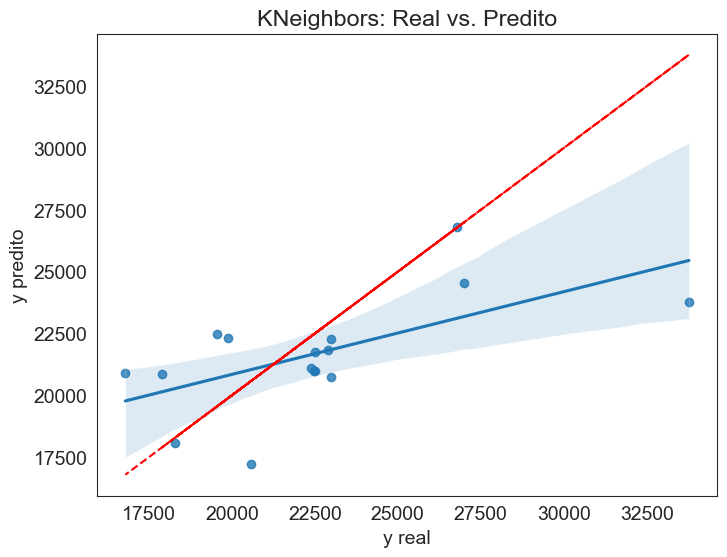

In [114]:
fig = plt.figure(figsize=(8, 6))
sns.set_style("white")
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x=y_test, y=y_knn_pred)
ax.set_title('KNeighbors: Real vs. Predito')
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')
plt.show()

## Utilizado o método Stacking

#### Combinado modelos com coeficiente de determinação (R²) acima de 0.30

> Stacking
---
O stacking envolve treinar um modelo de "meta-aprendizagem" que usa as previsões dos modelos individuais como recursos de entrada. Os modelos individuais atuam como "primeira camada" e suas previsões são usadas como entrada para treinar o modelo de meta-aprendizagem. Esse modelo de meta-aprendizagem, então, faz a previsão final.

In [115]:
stacking_train = np.column_stack((
                    y_knn_pred,
                    y_svr_pred,
                    y_bayesianridge_pred, #type: ignore
                    y_elasticnet_pred,
                    y_ridge_pred,
                    y_sgd_pred,
                    y_lr_pred,
                    y_lasso_pred
                ))

stacking_model = LinearRegression()
stacking_model.fit(stacking_train, y_test)

stacking_test = np.column_stack((
                    knn_best_model.predict(x_test_scaled),
                    svr_best_model.predict(x_test_scaled), 
                    bayesianridge_best_model.predict(x_test_scaled), #type: ignore
                    elasticnet_best_model.predict(x_test_scaled),
                    ridge_best_model.predict(x_test_scaled),
                    sgd_best_model.predict(x_test_scaled),
                    linear_regression_model.predict(x_test_scaled),
                    lasso_best_model.predict(x_test_scaled)
                ))

stacking_pred = stacking_model.predict(stacking_test)

mae = mean_absolute_error(y_test, stacking_pred)
mse = mean_squared_error(y_test, stacking_pred)
r2 = r2_score(y_test, stacking_pred)

print('Média do valor absoluto dos erros: ', mae)
print('Média dos erros quadráticos', mse)
print('Coeficiente de determinação (R²):', r2)

Média do valor absoluto dos erros:  1450.9375
Média dos erros quadráticos 3559612.4375
Coeficiente de determinação (R²): 0.7787393364691235


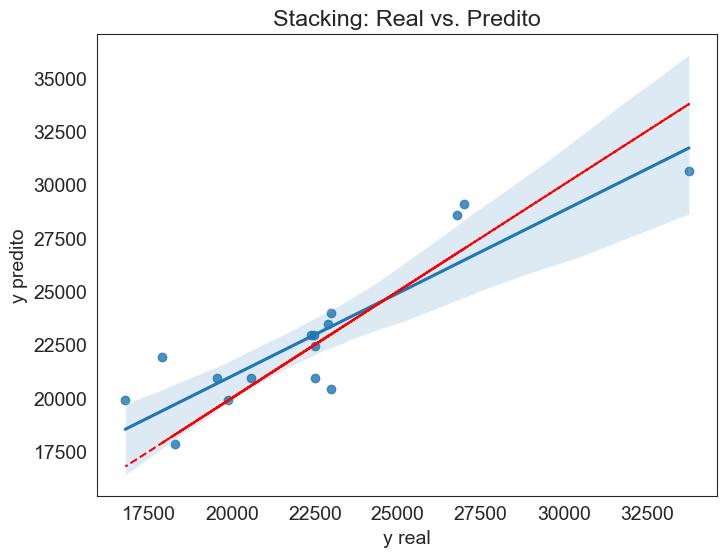

In [116]:
fig = plt.figure(figsize=(8, 6))
sns.set_style("white")
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x=y_test, y=stacking_pred)
ax.set_title('Stacking: Real vs. Predito')
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')
plt.show()

#### Teste do modelo

In [117]:
car=[[2018, 87000, 39.5]]
car_scaled = scaler.transform(car) #type: ignore
car_y = np.column_stack((
            knn_best_model.predict(car_scaled),
            svr_best_model.predict(car_scaled),
            bayesianridge_best_model.predict(car_scaled), #type: ignore
            elasticnet_best_model.predict(car_scaled),
            ridge_best_model.predict(car_scaled),
            sgd_best_model.predict(car_scaled),
            linear_regression_model.predict(car_scaled),
            lasso_best_model.predict(car_scaled)
        ))
print('---')
print('$ {0:.2f}'.format(stacking_model.predict(car_y)[0]))
print('---')

---
$ 28084.00
---


#### Salvar modelos

In [118]:
models = {
    'knn_best_model': knn_best_model,
    'svr_best_model': svr_best_model,
    'bayesianridge_best_model': bayesianridge_best_model,
    'elasticnet_best_model': elasticnet_best_model,
    'ridge_best_model': ridge_best_model,
    'sgd_best_model': sgd_best_model,
    'linear_regression_model': linear_regression_model,
    'lasso_best_model': lasso_best_model,
    'stacking_model': stacking_model,
}

for filename, model in models.items():
    with open(f'Data/{filename}', 'wb') as output:
        pickle.dump(model, output)